# **Trabalho final Data Mining - Cavalos**
Aluna: Ana Paula Costa Assumpção Mat: 221100813

Prof.: Manoela Kohler

Disciplina: Data Mining - BI Master

#**Carregamento da Bibliotecas**



In [132]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import ImageColor

In [133]:
import missingno as msno
#Cor padrão que será utilizada nos gráficos
color_rgb = ImageColor.getcolor("#66CDAA", "RGB")
color_norm = (color_rgb[0]/255, color_rgb[1]/255, color_rgb[2]/255)

*Fazer o upload dos seguintes arquivos, na aba esquerda do Google Colab*

*horse.csv*

*horseTest.csv*




\





#**Carregamento das Bases de Dados**

In [134]:
#Carregamento da base de treino
dataTrain = pd.read_csv('horse.csv', header=0)
dataTrain.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [135]:
#Carregamento da Base de Teste
dataTest = pd.read_csv('horseTest.csv', header=0)
dataTest.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,1,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
1,no,adult,2,39.1,72.0,52.0,warm,NaN,bright_pink,less_3_sec,...,50.0,7.8,NaN,NaN,lived,yes,2111,0,0,no
2,yes,adult,3,37.2,42.0,12.0,warm,normal,normal_pink,less_3_sec,...,NaN,7.0,NaN,NaN,lived,no,4124,0,0,no
3,no,young,4,38.0,92.0,28.0,normal,normal,bright_pink,less_3_sec,...,37.0,6.1,clear,NaN,died,no,0,0,0,yes
4,yes,adult,5,37.6,64.0,21.0,normal,normal,bright_pink,less_3_sec,...,40.0,7.0,clear,NaN,lived,yes,4205,0,0,yes


# **Análise Exploratória**


In [136]:
#Num de linhas, Num de colunas
dataTrain.shape

(299, 28)

In [137]:
#Num de linhas, Num de colunas
dataTest.shape

(89, 28)

In [138]:
dataTrain.describe().T


,count,mean,std,min,25%,50%,75%,max
hospital_number,299.0,1.087733e+06,1.532032e+06,518476.0,528904.0,530301.0,534736.00,5305629.0
rectal_temp,239.0,3.816862e+01,7.337444e-01,35.4,37.8,38.2,38.50,40.8
pulse,275.0,7.200000e+01,2.864622e+01,30.0,48.0,64.0,88.00,184.0
respiratory_rate,241.0,3.046058e+01,1.766610e+01,8.0,18.0,25.0,36.00,96.0
nasogastric_reflux_ph,53.0,4.707547e+00,1.982311e+00,1.0,3.0,5.0,6.50,7.5
packed_cell_volume,270.0,4.630741e+01,1.043674e+01,23.0,38.0,45.0,52.00,75.0
total_protein,266.0,2.427444e+01,2.736419e+01,3.3,6.5,7.5,56.75,89.0
abdomo_protein,101.0,3.039604e+00,1.967947e+00,0.1,2.0,2.3,3.90,10.1
lesion_1,299.0,3.659709e+03,5.408472e+03,0.0,2111.5,2322.0,3209.00,41110.0
lesion_2,299.0,9.052843e+01,6.506371e+02,0.0,0.0,0.0,0.00,7111.0


**Checagem dos tipos de atributos**



In [139]:
#Verificação dos tipos dos atributos. 
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [140]:
#Verificando se existem colunas duplicadas. Não há.
dataTrain.duplicated().sum()

0

Analisando todos os valores distintos de cada uma das colunas para verificar se existe algum valor "fora do padrão". 

Não há. 

Há valores nulos que serão tratados posteriormente. 

In [141]:
for column in dataTrain.columns:
  print(column)
  print(dataTrain[column].nunique())
  print(dataTrain[column].unique())
  print('\n')

surgery
2
['no' 'yes']


age
2
['adult' 'young']


hospital_number
283
[ 530101  534817  530334 5290409  530255  528355  526802  529607  530051
 5299629  528548  527927  528031 5291329  534917  530233 5301219  526639
 5290481  532110  530157  529340  521681  534998  533692  529518  530526
  528653 5279442  535415  529475  530242  529427  529663  529796  528812
  529493  533847  528996 5277409  529498 5288249  530301  534069  535407
  529827  529888  529821  528890  529642  529766  527706  529483  530544
  529461 5282839  528872  529640  528298  528904  530438  527957  528630
  534293  529667  534885  534784  528931  529777  530276  528214  529424
 5299253  528469 5292929  534092  534615  534753  530693  527463  527518
  534756 5290759 5279822  529849  529304  529388  528006  529703  535381
  534197  530251  530310  528729  535158  530319  534145  534135  530002
  535364  534899  534938 5292489  527563  530381  528668  529764  533696
 5297379  527544  533736  534963  527933  532349  533

In [142]:
for column in dataTest.columns:
  print(column)
  print(dataTest[column].nunique())
  print(dataTest[column].unique())
  print('\n')

surgery
2
['no' 'yes']


age
2
['adult' 'young']


hospital_number
89
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]


rectal_temp
30
[37.3 39.1 37.2 38.  37.6 38.6 38.3 37.8  nan 38.9 39.  38.4 37.  39.7
 37.7 38.2 36.5 39.4 37.9 38.1 36.  38.8 39.5 38.7 38.5 39.3 39.2 36.1
 37.5 40.8 37.1]


pulse
35
[104.  72.  42.  92.  64. 130.  48. 100. 112. 120.  80.  46. 160.  96.
  54.  60.  nan  40.  84.  44. 140.  70.  78.  56.  76. 129.  88.  86.
  36. 108. 184.  75. 150.  66.  82.  45.]


respiratory_rate
28
[35. 52. 12. 28. 21. 34. 60. 30. 24. 16. nan 44. 20. 36. 80. 40. 10. 68.
 66. 32.  9. 48. 14. 90. 70. 42. 84. 18. 50.]


temp_of_extremities
4
[nan 'warm' 'normal' 'cool' 'cold']


peripheral_pulse
4
[nan 'normal' 'reduced' 'absent' 'increased']


mucous_membrane
6

### **Verificação de Nulos**
Na verficação de nulos observa-se que os seguintes atributos possuem alto percentual de valores nulos (>40%). Esses atributos são:

`nasogastric_reflux_ph`

`abdomo_protein`

`abdomo_appearance`

In [143]:
#Exbindo o percentual (%) de nulos por coluna, ordenados em ordem descentente. 
np.round((dataTrain.isnull().sum()/len(dataTrain))*100,2).sort_values(ascending=False)

nasogastric_reflux_ph    82.27
abdomo_protein           66.22
abdomo_appearance        55.18
abdomen                  39.46
nasogastric_reflux       35.45
nasogastric_tube         34.78
rectal_exam_feces        34.11
peripheral_pulse         23.08
rectal_temp              20.07
respiratory_rate         19.40
temp_of_extremities      18.73
abdominal_distention     18.73
pain                     18.39
mucous_membrane          15.72
peristalsis              14.72
total_protein            11.04
capillary_refill_time    10.70
packed_cell_volume        9.70
pulse                     8.03
lesion_2                  0.00
surgical_lesion           0.00
lesion_3                  0.00
lesion_1                  0.00
surgery                   0.00
outcome                   0.00
age                       0.00
hospital_number           0.00
cp_data                   0.00
dtype: float64

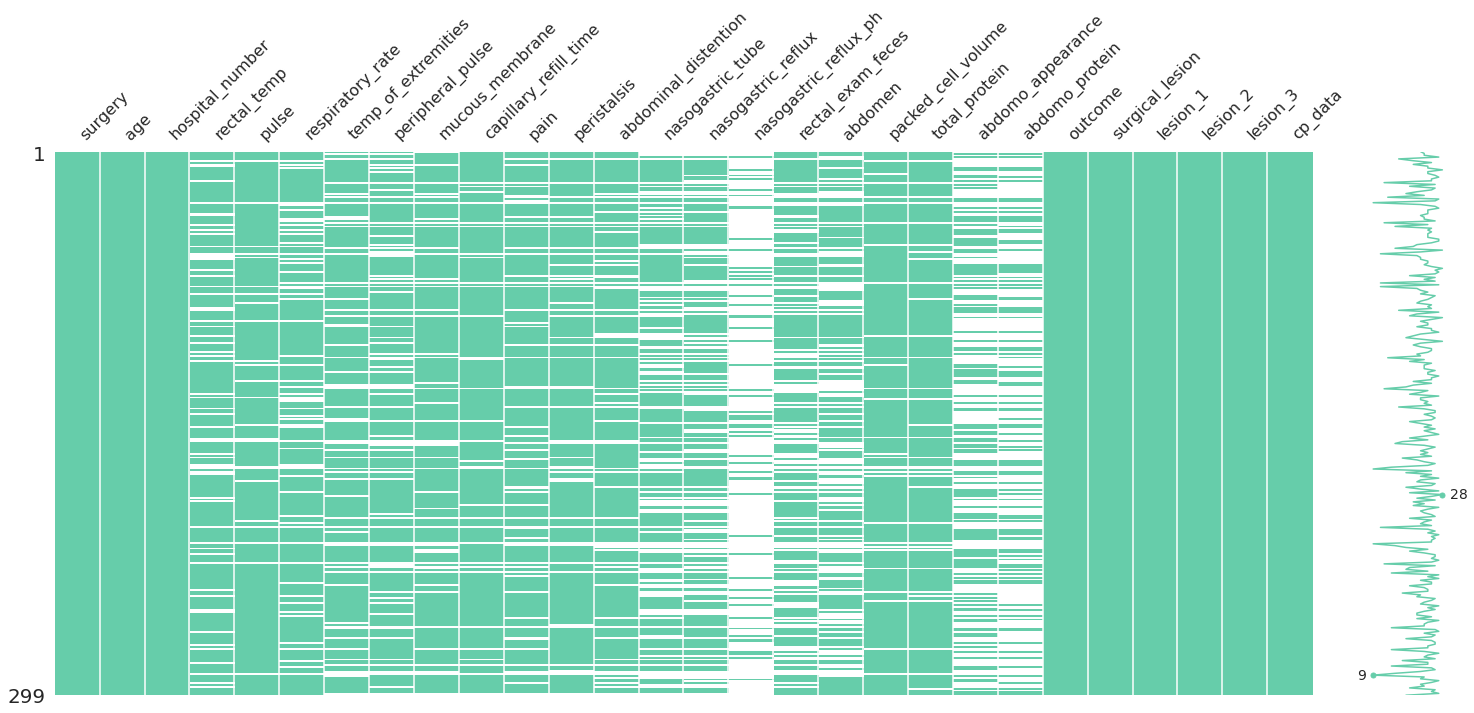

In [144]:
msno.matrix(dataTrain, figsize=(25,10), color=color_norm);


### **Identificação dos atributos numéricos e categóricos**

In [145]:
# atributos numéricos
numeric_cols = ['rectal_temp', 
                'pulse', 
                'respiratory_rate', 
                'nasogastric_reflux_ph', 
                'packed_cell_volume',
                'total_protein',
                'abdomo_protein']

In [146]:
# atributos categóricos
categorical_cols = ['surgery',
                    'age',  
                    'temp_of_extremities', 
                    'peripheral_pulse',
                    'mucous_membrane', 
                    'capillary_refill_time', 
                    'pain',  
                    'peristalsis',  
                    'abdominal_distention', 
                    'nasogastric_tube',  
                    'nasogastric_reflux',
                    'rectal_exam_feces',
                    'abdomen',
                    'abdomo_appearance',
                    'outcome',
                    'surgical_lesion']


###**Análise dos atributos numéricos**

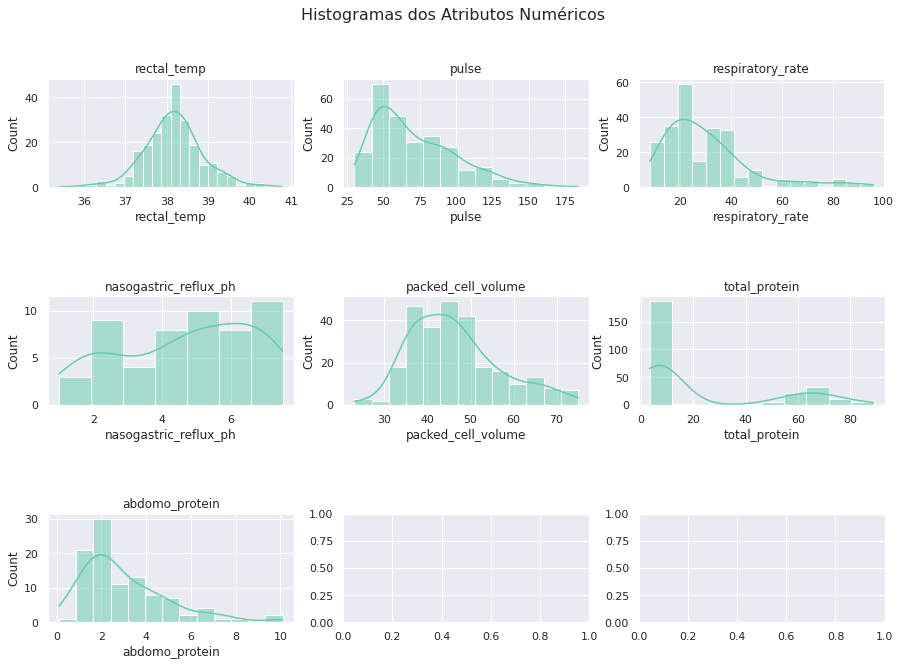

In [147]:
# definindo o número de colunas e linhas de subplots
n_cols = 3
n_rows = len(numeric_cols) // n_cols + len(numeric_cols) % n_cols

# criando a figura com os subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10), gridspec_kw={"wspace":0.2, "hspace":1})
sns.set_style("darkgrid")
fig.suptitle('Histogramas dos Atributos Numéricos', fontsize=16)

# gerando os histogramas e adicionando a cada subplot
for i, col_name in enumerate(numeric_cols):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(data=dataTrain, x=col_name, kde=True, ax=axs[row, col], color=color_norm)
    axs[row, col].set(title=col_name)
   

plt.show()


Nos gráficos acima podemos perceber que quase todos os dados numéricos estão seguindo uma distuibuição próxima da distribuição gaussiana. Para esses atributos, com execção de **`nasogastric_reflux_ph`** e **`total_protein`** os valores ausentes serão substituidos pela mediana. 


### **Outliers**

Abaixo foi plotado o gráfico dos outliers das colunas numéricas juntamente com o histograma para poder visualizar melhor os outliers na distribuição. 
No pré-processamento os outliers serão substituídos pelos limites inferiores e superioes de IQR



<Figure size 504x576 with 0 Axes>

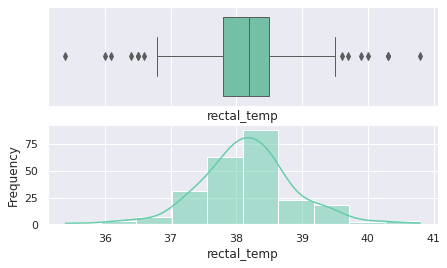

<Figure size 504x576 with 0 Axes>

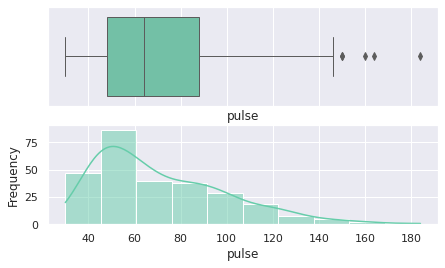

<Figure size 504x576 with 0 Axes>

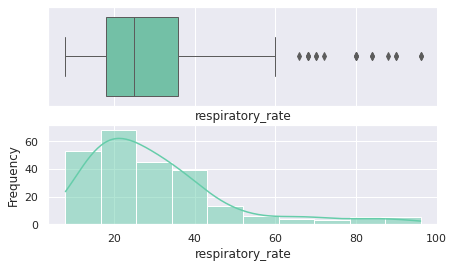

<Figure size 504x576 with 0 Axes>

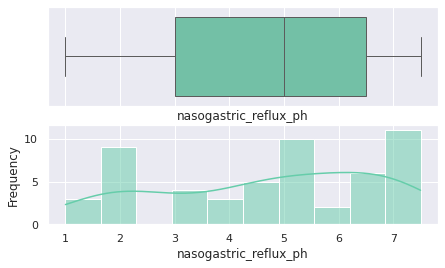

<Figure size 504x576 with 0 Axes>

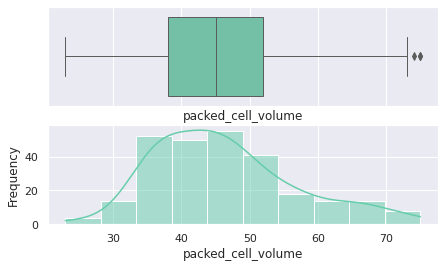

<Figure size 504x576 with 0 Axes>

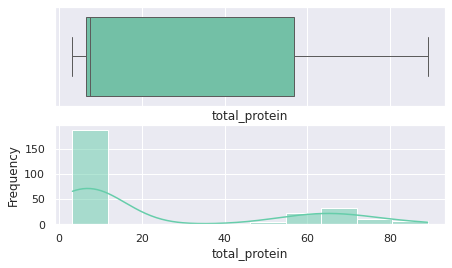

<Figure size 504x576 with 0 Axes>

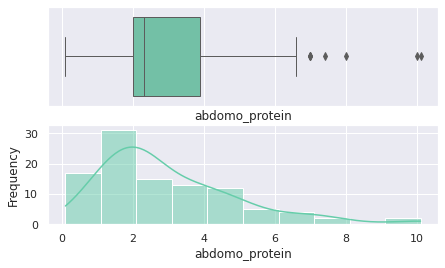

In [148]:
for i in dataTrain[numeric_cols]:
    plt.figure()
    plt.tight_layout()
    sns.set_style("darkgrid")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(7, 4), gridspec_kw={"wspace":0.2, "hspace":0.2} )
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x=i, data=dataTrain, ax=ax_box , linewidth= 1.0, color=color_norm)
    sns.histplot( dataTrain[i], ax=ax_hist , bins = 10,kde=True,color=color_norm)
    plt.show()

    

###**Análise dos atributos categóricos**

In [149]:
dataTrain[categorical_cols].describe().T

,count,unique,top,freq
surgery,299,2,yes,180
age,299,2,adult,275
temp_of_extremities,243,4,cool,108
peripheral_pulse,230,4,normal,114
mucous_membrane,252,6,normal_pink,79
capillary_refill_time,267,3,less_3_sec,187
pain,244,5,mild_pain,67
peristalsis,255,4,hypomotile,127
abdominal_distention,243,4,none,75
nasogastric_tube,195,3,slight,101


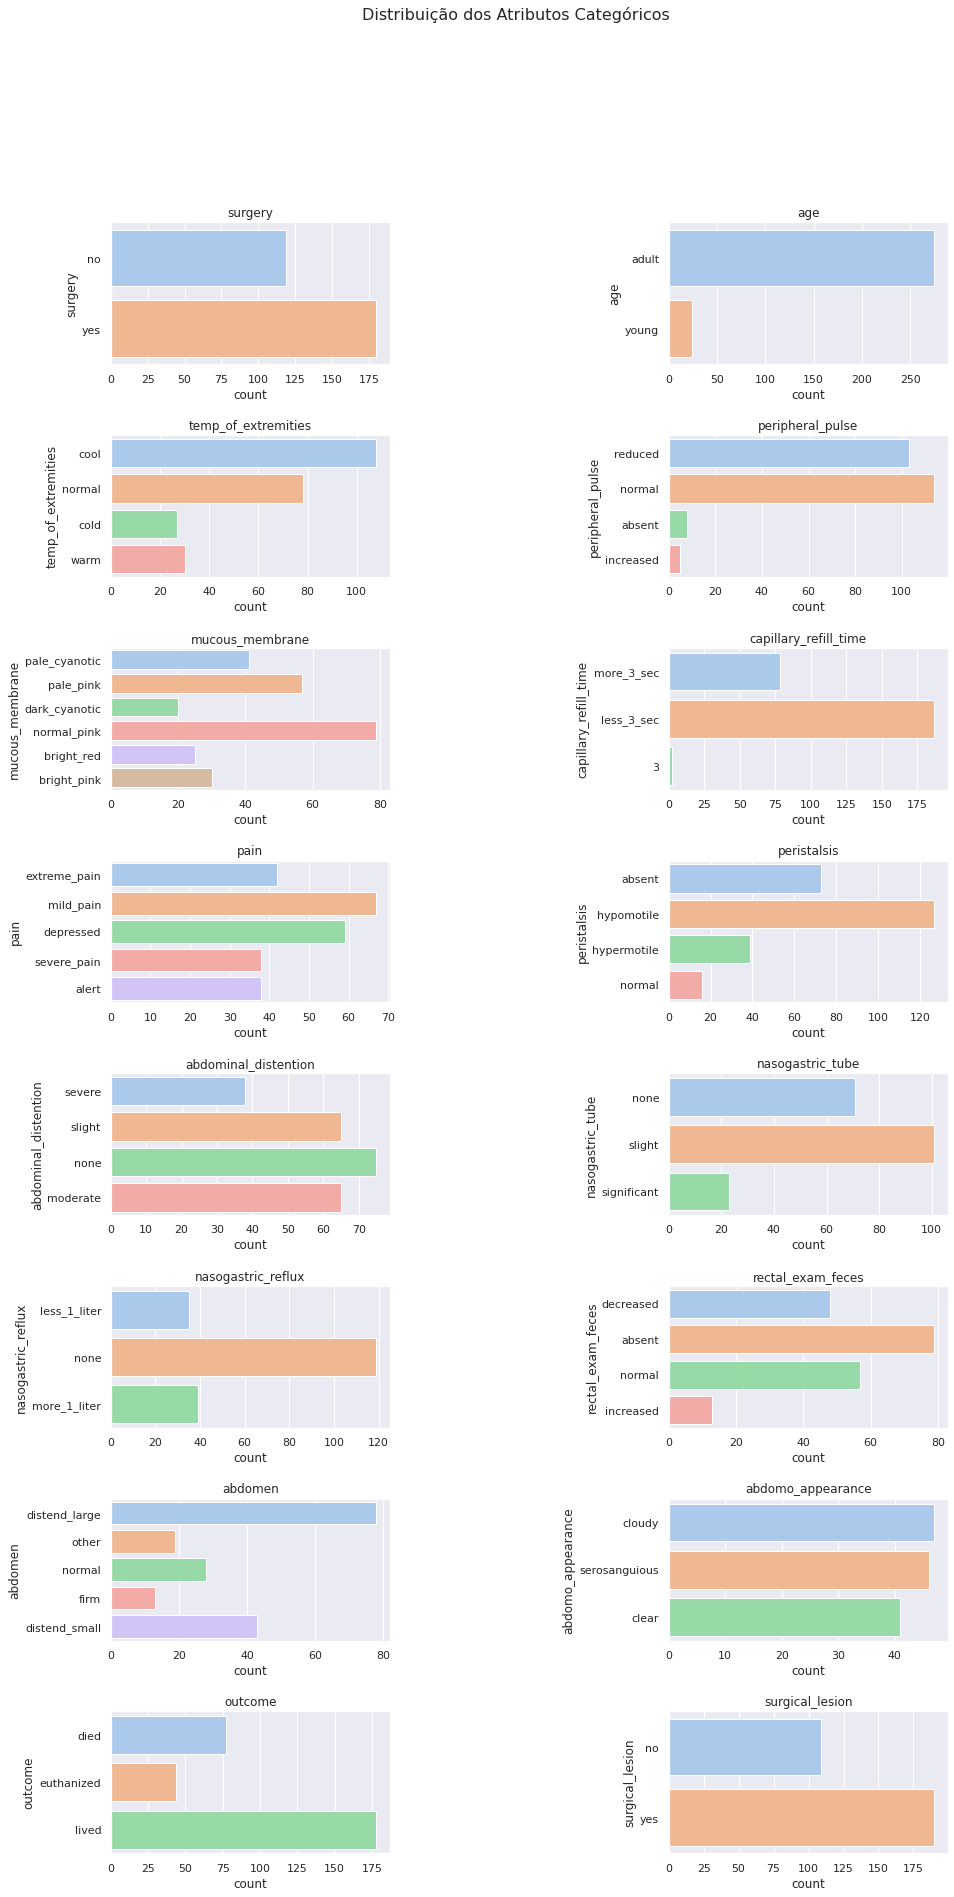

In [150]:
# definindo o número de colunas e linhas de subplots
n_cols = 2
n_rows = len(categorical_cols) // n_cols + len(categorical_cols) % n_cols

# criando a figura com os subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 30), gridspec_kw={"wspace":1, "hspace":0.5})
sns.set_style("darkgrid")
sns.set_palette("pastel")
fig.suptitle('Distribuição dos Atributos Categóricos', fontsize=16)

# gerando os gráficos e adicionando a cada subplot
for i, col_name in enumerate(categorical_cols):
    row = i // n_cols
    col = i % n_cols
    sns.countplot(data=dataTrain, y=col_name, ax=axs[row, col])
    axs[row, col].set(title=col_name)
   

plt.show()

##**Balanceamento** 

Verficando se a base está com a saída balanceada.

Pela análise abaixo percebemos que a base se encontra desbalanceada, o que pode prejudicar os modelos.

lived = 178

euthanized = 77

died = 44

Solução adotada: 

Assumir que as saídas euthanized e died são iguais, pois ambas indicam a morte do animal, solução que será adotada. 

Após a susbtituição dos valores de saída euthanized por died, a base ficou melhor balanceada.

lived = 178

died = 121


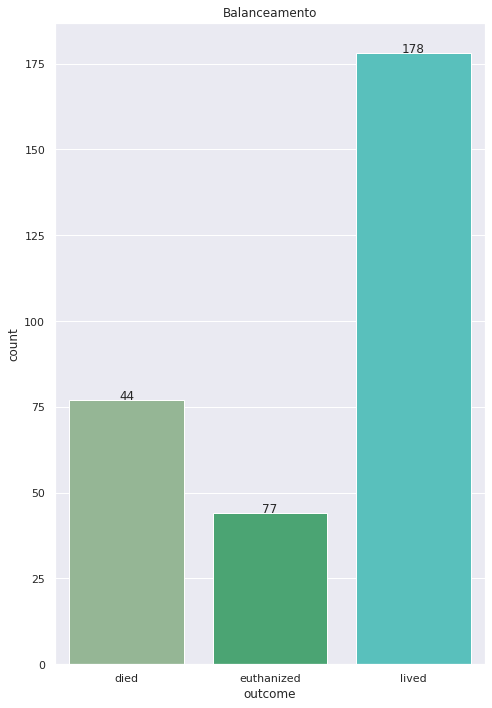

In [151]:
# Balanceamento
colors = ['darkseagreen','mediumseagreen', 'mediumturquoise']
sns.set_style("darkgrid")
sns.set(rc={"figure.figsize":(7, 10)})
graph = sns.countplot(data=dataTrain, x='outcome', palette=colors)
plt.title('Balanceamento')
plt.tight_layout()

for idx, bar in enumerate(graph.patches):
    height = bar.get_height()
    graph.text(x=bar.get_x() + bar.get_width()/2., y=height + 0.2, s=(dataTrain['outcome'].value_counts()).sort_values()[idx], ha="center")

plt.show()

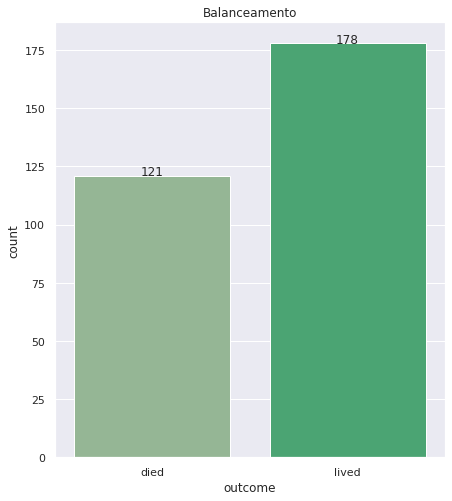

In [152]:
# substitui registros euthanized por died no atributo outcome - dataset Treino
dataTrain.outcome.replace({'euthanized': 'died'}, inplace=True)

# substitui registros euthanized por died no atributo outcome - dataset Test
dataTest.outcome.replace({'euthanized': 'died'}, inplace=True)


sns.set_style("darkgrid")
sns.set(rc={"figure.figsize":(7, 8)})
graph = sns.countplot(data=dataTrain, x='outcome',  palette=colors)
plt.title('Balanceamento')

for idx, bar in enumerate(graph.patches):
    height = bar.get_height()
    graph.text(x=bar.get_x() + bar.get_width()/2., y=height + 0.1, s=(dataTrain['outcome'].value_counts()).sort_values()[idx], ha="center")

plt.show()

## **Análise dos Atributos Numéricos x Saída**




Através da análise dos atributos numéricos x saída, é possivel verificar que:

- Os cavalos que morreram apresentavam pulso elevado
- Os cavalos que sobreviveram apresentavam o número de glóbulos vermelhos (`packed_cell_volume`) entre 30 e 50. Os que passam deste número apresentaram um número maior de mortes.






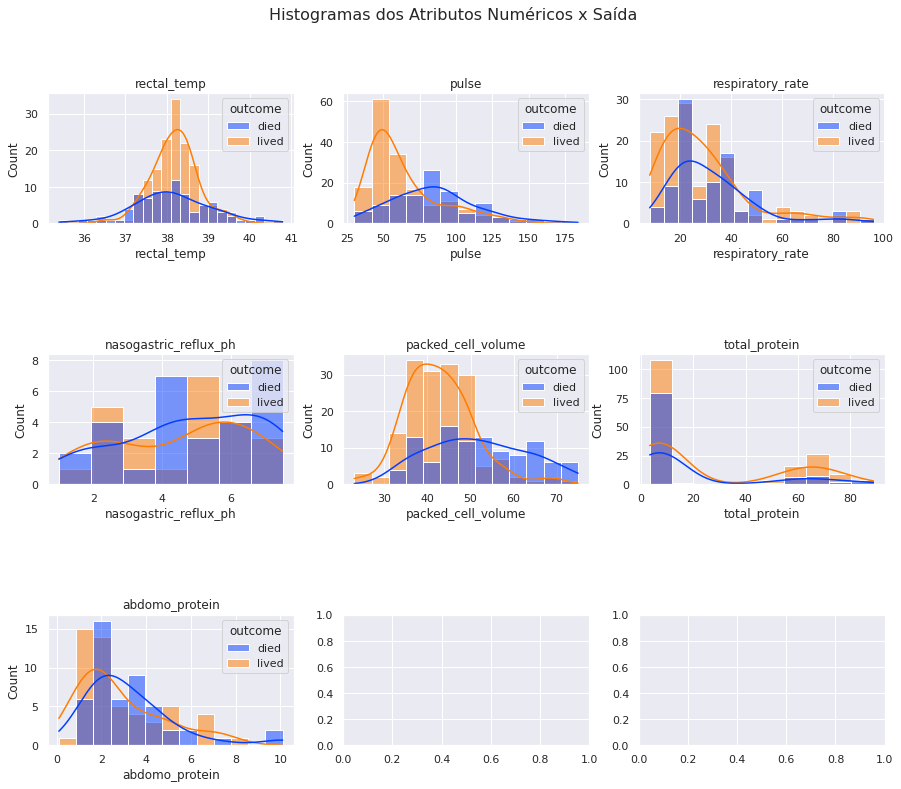

In [153]:
# definindo o número de colunas e linhas de subplots
n_cols = 3
n_rows = len(numeric_cols) // n_cols + len(numeric_cols) % n_cols

# criando a figura com os subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12), gridspec_kw={"wspace":0.2, "hspace":1})
sns.set_style("darkgrid")
sns.set_palette("bright")
fig.suptitle('Histogramas dos Atributos Numéricos x Saída', fontsize=16)

# gerando os histogramas e adicionando a cada subplot
for i, col_name in enumerate(numeric_cols):
    row = i // n_cols
    col = i % n_cols
    sns.histplot(data=dataTrain, x=col_name, hue=dataTrain.outcome, kde=True, ax=axs[row, col], color=color_norm)
    axs[row, col].set(title=col_name)
   

plt.show()


## **Análise dos Atributos Categóricos: x Saída**

Através da análise dos atributos categóricos x saída é possível observar que:

- A maioria dos cavalos que apresentavam temperatura das extremidades (**`temp_of_extremities`**) baixa, morreram.
- A maioria dos cavalos que apresentavam pulsação periférica (**`peripheral_pulse`**) reduzida ou sem medição, morreram.
- A maioria dos cavalos que apresentavam pulsação periférica (**`peripheral_pulse`**) reduzida ou sem medição, morreram.
- A maioria dos cavalos que apresentavam distensão abdominal (**`abdominal_distention`**) moderada ou severa, morreram.
- A maioria dos cavalos que apresentavam dores (**`pain`**) extremas e severas, morreram
- A maioria dos cavalos que tiveram lesões cirurgicas (**`surgical_lesions`**), morreram.
- Aproximadamente metade dos cavalos jovens morreram


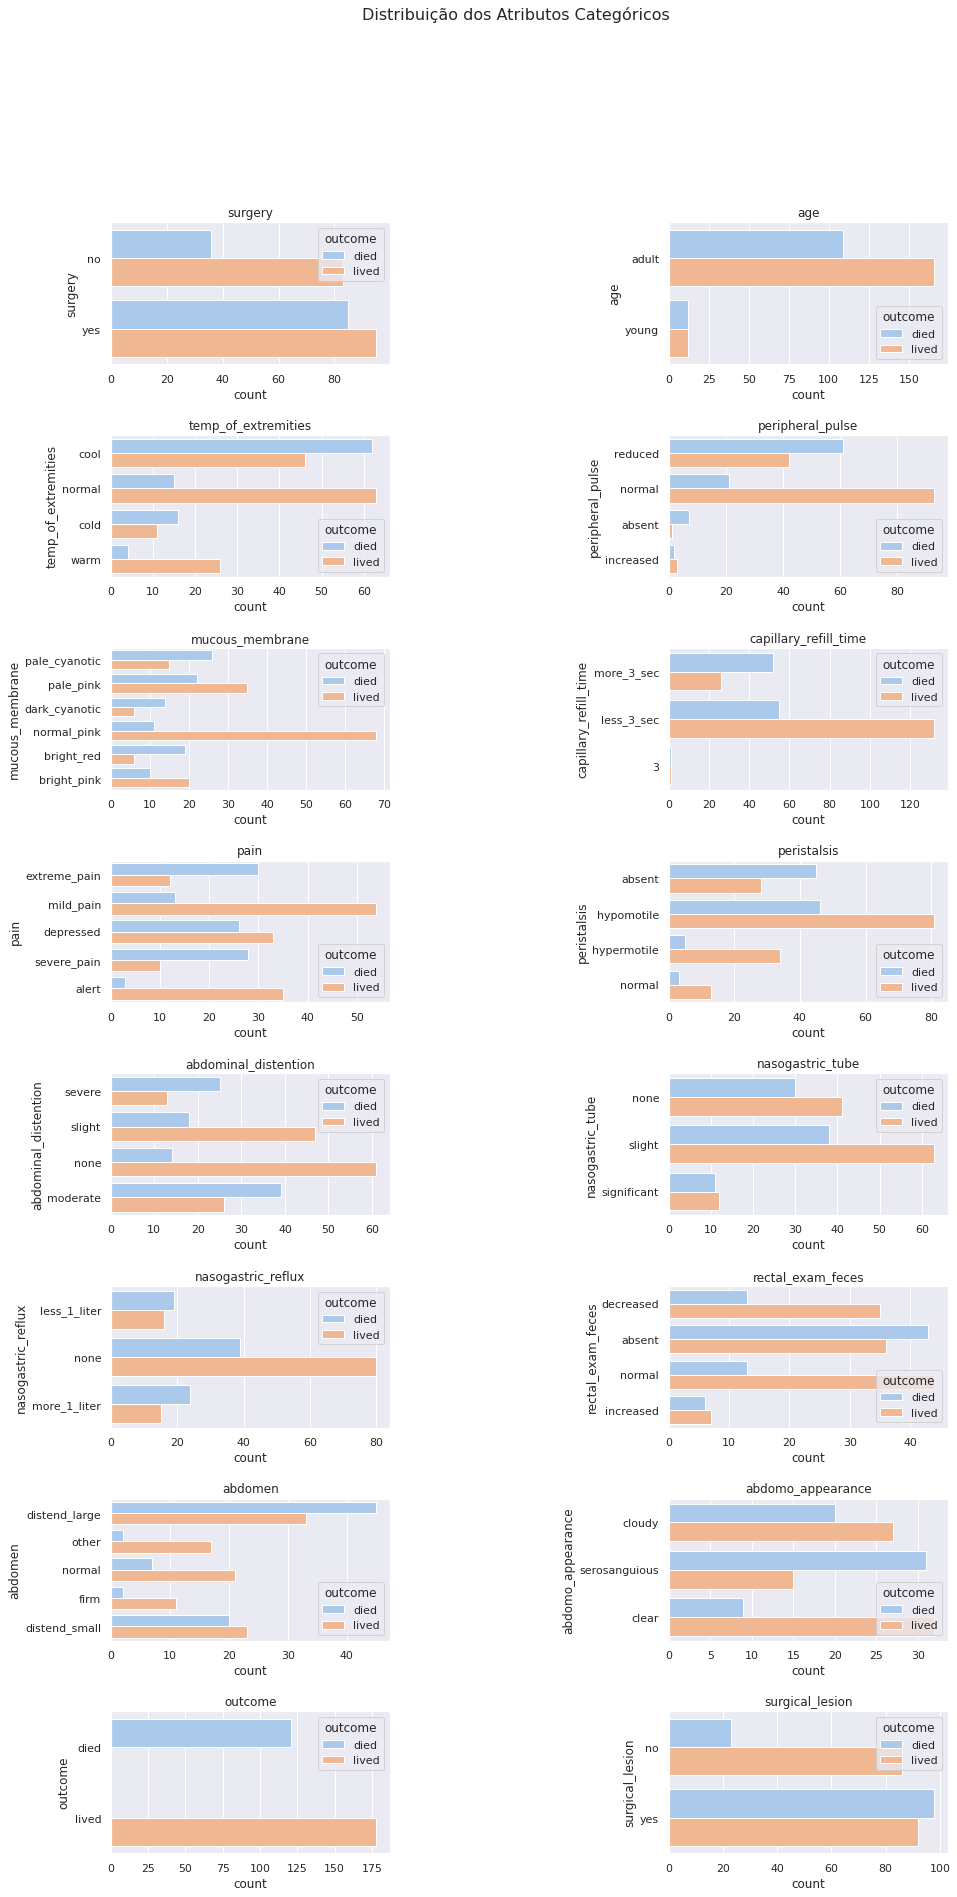

In [154]:
# definindo o número de colunas e linhas de subplots
n_cols = 2
n_rows = len(categorical_cols) // n_cols + len(categorical_cols) % n_cols

# criando a figura com os subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 30), gridspec_kw={"wspace":1, "hspace":0.5})
sns.set_style("darkgrid")
sns.set_palette("pastel")
fig.suptitle('Distribuição dos Atributos Categóricos', fontsize=16)

# gerando os gráficos e adicionando a cada subplot
for i, col_name in enumerate(categorical_cols):
    row = i // n_cols
    col = i % n_cols
    sns.countplot(data=dataTrain, y=col_name, hue=dataTrain.outcome, ax=axs[row, col])
    axs[row, col].set(title=col_name)
   

plt.show()

# **Pré Processamento**

## **Cenários de Pré Processamento**

Para avaliação inicial dos modelos os seguintes cenários serão avaliados:

* **Cenário 1 (`sc01`)**: Remoção de dados faltantes > 80%; com tratamento de Outliers
* **Cenário 2 (`sc02`)**: Remoção de dados faltantes > 80%; sem tratamento de Outliers

* **Cenário 3 (`sc03`)**: Remoção de dados faltantes > 40%; com tratamento de Outliers
* **Cenário 4 (`sc04`)**: Remoção de dados faltantes > 40%; sem tratamento de Outliers







### **Remoção de colunas**

As seguintes colunas serão removidas da base de treino e de teste: 

- **`nasogastric_reflux_ph`**: Possui mais do que 80% de dados faltantes.
- **`hospital_number`**: Identificador de entrada no hospital. Irrelevante para análise. 
- **`cp_data`**: Parâmetro irrelevante para a análise, conforme descrito no dicionário de dados fornecido com a amostra. 
- **`lesion_1`**: Pouca variância de dados
- **`lesion_2`**: Pouca variância de dados
- **`lesion_3 `**: Pouca variância de dados

Depois as colunas **`abdomo_protein`** e **`abdomo_appearance`** também serão removidas para testes com os cenários 03 e 04


In [155]:
#Colunas a serem removidas, removendo colunas com > 80% dados faltantes
cols_to_delete = ['nasogastric_reflux_ph',
                  'hospital_number', 
                  'cp_data', 
                  'lesion_1', 
                  'lesion_2',
                  'lesion_3']




#removendo colunas da base de treino
dataTrain = dataTrain.drop(cols_to_delete, axis=1)

#removendo colunas da base de teste
dataTest = dataTest.drop(cols_to_delete, axis=1)

In [156]:
dataTrain.shape

(299, 22)

In [157]:
dataTest.shape

(89, 22)

### **Tratamento de Nulos**

Substituição dos nulos pela média


In [158]:
#Sustituindo nulos pela média no dataset de Treino
dataTrain['total_protein'] = dataTrain['total_protein'].fillna(dataTrain['total_protein'].mean())

#Sustituindo nulos pela média no dataset de Teste
dataTest['total_protein'] = dataTest['total_protein'].fillna(dataTest['total_protein'].mean())


Substituição dos nulos pela mediana 

In [159]:

cols_to_median = ['rectal_temp', 
                  'pulse', 
                  'respiratory_rate', 
                  'packed_cell_volume',
                  'abdomo_protein']

        
# Imputar dados faltantes utilizando a mediana. 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

#Sustituindo nulos pela média no dataset de Treino
imputer.fit(dataTrain[cols_to_median])
dataTrain[cols_to_median] = imputer.transform(dataTrain[cols_to_median])


#Sustituindo nulos pela média no dataset de Teste 
imputer.fit(dataTest[cols_to_median])
dataTest[cols_to_median] = imputer.transform(dataTest[cols_to_median])


Substituição dos nulos pela moda 

In [160]:
cols_to_mode = ['surgery',
                'age',  
                'temp_of_extremities', 
                'peripheral_pulse',
                'mucous_membrane', 
                'capillary_refill_time', 
                'pain',  
                'peristalsis',  
                'abdominal_distention', 
                'nasogastric_tube',  
                'nasogastric_reflux',
                'rectal_exam_feces',
                'abdomen',
                'surgical_lesion',
                'abdomo_appearance']  

imputer = SimpleImputer(strategy="most_frequent")

#Sustituindo nulos pela moda no dataset de Treino 
imputer.fit(dataTrain[cols_to_mode])
dataTrain[cols_to_mode] = imputer.transform(dataTrain[cols_to_mode])

#Sustituindo nulos pela média no dataset de Teste
imputer.fit(dataTest[cols_to_mode])
dataTest[cols_to_mode] = imputer.transform(dataTest[cols_to_mode])


In [161]:
dataTrain.isnull().sum().sum()

0

In [162]:
dataTest.isnull().sum().sum()

0

### **Encoding**

In [163]:
# Encoding de valores categóricos para numéricos - dataset Treino
dataTrain['surgery'] = dataTrain['surgery'].map({'yes': 1, 'no': 0})
dataTrain['surgical_lesion'] = dataTrain['surgical_lesion'].map({'yes': 1, 'no': 0})
dataTrain['age'] = dataTrain['age'].map({'adult': 1, 'young': 0})


# Encoding de valores categóricos para numéricos - dataset Teste
dataTest['surgery'] = dataTest['surgery'].map({'yes': 1, 'no': 0})
dataTest['surgical_lesion'] = dataTest['surgical_lesion'].map({'yes': 1, 'no': 0})
dataTest['age'] = dataTest['age'].map({'adult': 1, 'young': 0})


# Encoding de valores ordinais para numéricos onde faz sentido uma ordenação) - dataset Treino
dataTrain['abdominal_distention'] = dataTrain['abdominal_distention'].map({'none': 1, 'slight': 2, 'moderate': 3, 'severe': 4})
dataTrain['nasogastric_tube'] = dataTrain['nasogastric_tube'].map({'none': 1, 'slight': 2, 'significant': 3})

# Encoding de valores ordinais para numéricos onde faz sentido uma ordenação) - dataset Treino
dataTest['abdominal_distention'] = dataTest['abdominal_distention'].map({'none': 1, 'slight': 2, 'moderate': 3, 'severe': 4})
dataTest['nasogastric_tube'] = dataTest['nasogastric_tube'].map({'none': 1, 'slight': 2, 'significant': 3})


# Encoding do valor de saída- outcome - dataset Treino
dataTrain['outcome'] = dataTrain['outcome'].map({'died': 1, 'lived': 0})

# Encoding do valor de saída- outcome - dataset Teste
dataTest['outcome'] = dataTest['outcome'].map({'died': 1, 'lived': 0})




**Dummy Enconding**

Para os seguintes atributos categóricos será realizado One-Hot Encoding 



In [164]:
# Atributos categóricas para Dummy encoding
cols_to_dummy_encoding = ['temp_of_extremities',
                          'peripheral_pulse',
                          'mucous_membrane',
                          'capillary_refill_time',
                          'pain',
                          'peristalsis',
                          'nasogastric_reflux',
                          'rectal_exam_feces',
                          'abdomen',
                          'abdomo_appearance']

# One hot encoding nas variáveis categóricas - dataset Treino
dataTrain = pd.get_dummies(dataTrain, columns=cols_to_dummy_encoding, drop_first=True)

# One hot encoding nas variáveis categóricas - dataset Test
dataTest = pd.get_dummies(dataTest, columns=cols_to_dummy_encoding, drop_first=True)

In [165]:
dataTrain.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,abdominal_distention,nasogastric_tube,packed_cell_volume,total_protein,abdomo_protein,...,nasogastric_reflux_none,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious
0,0,1,38.5,66.0,28.0,4,2,45.0,8.4,2.3,...,1,1,0,0,0,0,0,0,1,0
1,1,1,39.2,88.0,20.0,2,2,50.0,85.0,2.0,...,1,0,0,0,0,0,0,1,1,0
2,0,1,38.3,40.0,24.0,1,2,33.0,6.7,2.3,...,1,0,0,1,0,0,1,0,1,0
3,1,0,39.1,164.0,84.0,4,1,48.0,7.2,5.3,...,0,1,0,0,0,0,0,0,0,1
4,0,1,37.3,104.0,35.0,1,2,74.0,7.4,2.3,...,1,0,0,0,0,0,0,0,1,0


In [166]:
dataTest.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,abdominal_distention,nasogastric_tube,packed_cell_volume,total_protein,abdomo_protein,...,nasogastric_reflux_none,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious
0,0,1,37.3,104.0,35.0,2,2,74.0,7.4,2.0,...,1,0,0,0,0,0,0,0,1,0
1,0,1,39.1,72.0,52.0,2,1,50.0,7.8,2.0,...,1,0,0,0,1,0,0,0,1,0
2,1,1,37.2,42.0,12.0,3,3,44.0,7.0,2.0,...,1,0,0,0,0,0,0,0,1,0
3,0,0,38.0,92.0,28.0,2,3,37.0,6.1,2.0,...,1,0,0,1,0,0,1,0,0,0
4,1,1,37.6,64.0,21.0,1,1,40.0,7.0,2.0,...,1,0,1,0,0,0,0,0,0,0


### **Tratamento dos Outliers**

Nessa etapa foi utilizado o método de amplitude interquantílica (IQR) para substituição dos valores de Outliers, onde os valores que estavam abaixo do limite inferior receberam o limite inferior como o novo valor, e os valores acima do limite superior receberam o limite superior como novo valor.

Foi realizada uma cópia das bases de treino e teste antes dessa transformação para análise dos modelos. 

**Aplicando o tratamento de Outliers na base de Treino**

In [167]:
# Função para tratar outliers
def tratar_outliers_IQR(coluna):
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3 - Q1
    limite_superior = Q3 + 1.5*IQR
    limite_inferior = Q1 - 1.5*IQR
    return np.clip(coluna, limite_inferior, limite_superior)

In [168]:
dataTrain_beforeOutliers = dataTrain.copy()
# Substituir os outliers pelos limites de IQR
numeric_cols = ['rectal_temp', 
                'pulse', 
                'respiratory_rate', 
                'packed_cell_volume',
                'total_protein',
                'abdomo_protein']

dataTrain[numeric_cols] = dataTrain[numeric_cols].apply(tratar_outliers_IQR)

# Substituir valores negativos no limite inferior por zero
dataTrain[dataTrain < 0] = 0


No Gráficos abaixo é possível observar como ficou a distribuição dos dados após o tratamento de Outliers. 

<Figure size 504x576 with 0 Axes>

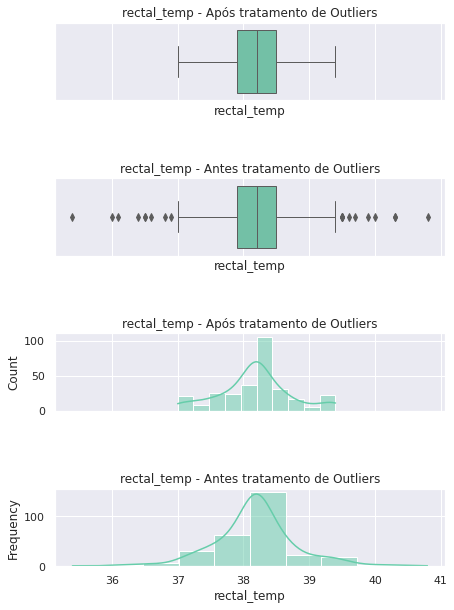

<Figure size 504x576 with 0 Axes>

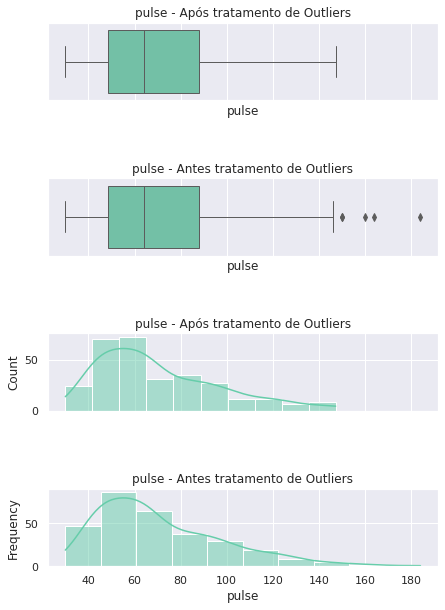

<Figure size 504x576 with 0 Axes>

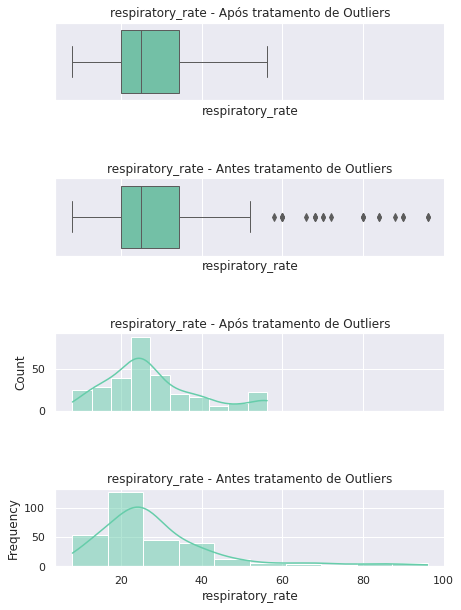

<Figure size 504x576 with 0 Axes>

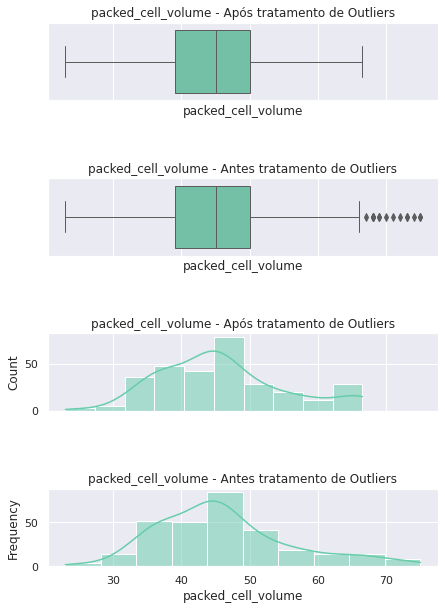

<Figure size 504x576 with 0 Axes>

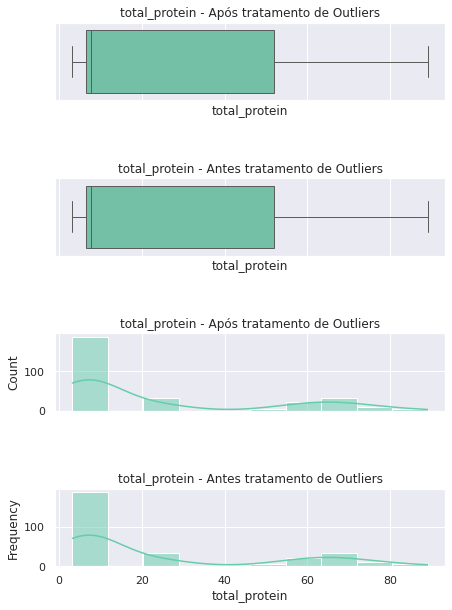

<Figure size 504x576 with 0 Axes>

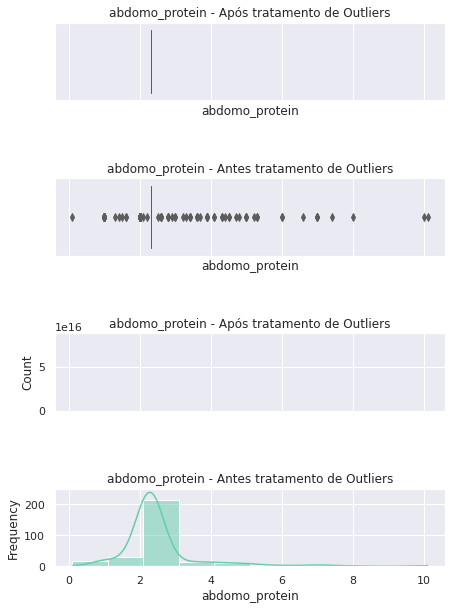

In [169]:
for i in dataTrain[numeric_cols]:
    plt.figure()
    plt.tight_layout()
    sns.set_style("darkgrid")
    f, (ax_box1,ax_box2, ax_hist1,ax_hist2 ) = plt.subplots(4, sharex=True, figsize=(7, 10), gridspec_kw={"wspace":0.2, "hspace":1} )

    ax_box1.set_title(i + " - Após tratamento de Outliers")
    ax_box2.set_title(i + " - Antes tratamento de Outliers")
    ax_hist1.set_title(i + " - Após tratamento de Outliers")
    ax_hist2.set_title(i + " - Antes tratamento de Outliers")

    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot( x=i, data=dataTrain, ax=ax_box1 , linewidth= 1.0, color=color_norm)
    sns.histplot( dataTrain[i], ax=ax_hist1 , bins = 10,kde=True,color=color_norm)
    sns.boxplot(x=i, data=dataTrain_beforeOutliers, ax=ax_box2 , linewidth= 1.0, color=color_norm)
    sns.histplot( dataTrain_beforeOutliers[i], ax=ax_hist2 , bins = 10,kde=True,color=color_norm)
    plt.show()

In [170]:
dataTrain.abdomo_protein.value_counts()

2.3    299
Name: abdomo_protein, dtype: int64

**Replicando o mesmo para a base de Teste**



In [171]:

dataTest_beforeOutliers = dataTrain.copy()
# Substituir os outliers pelos limites de IQR
dataTest[numeric_cols] = dataTest[numeric_cols].apply(tratar_outliers_IQR)

# Substituir valores negativos no limite inferior por zero
dataTest[dataTrain < 0] = 0



<Figure size 504x576 with 0 Axes>

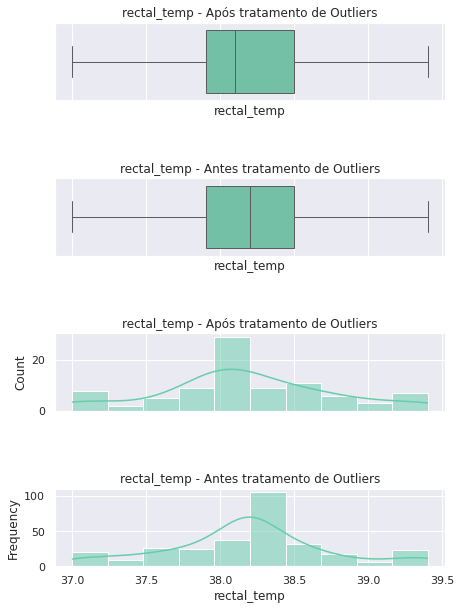

<Figure size 504x576 with 0 Axes>

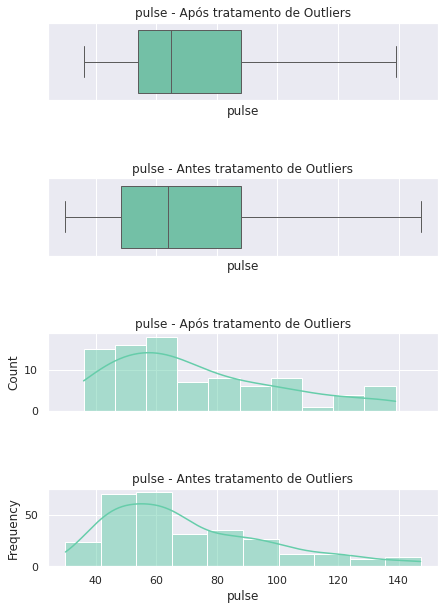

<Figure size 504x576 with 0 Axes>

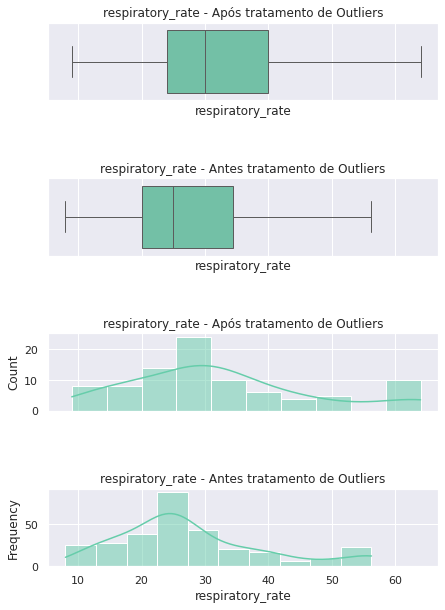

<Figure size 504x576 with 0 Axes>

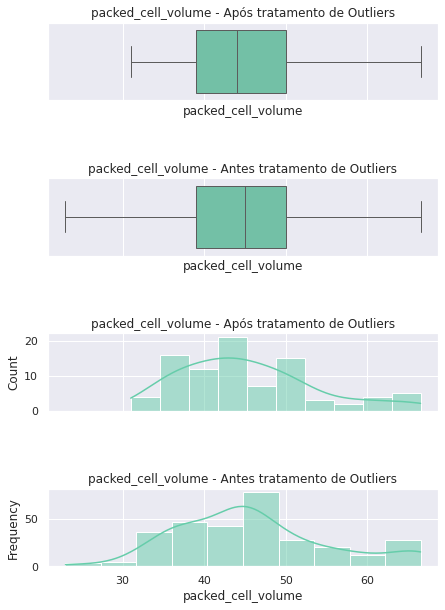

<Figure size 504x576 with 0 Axes>

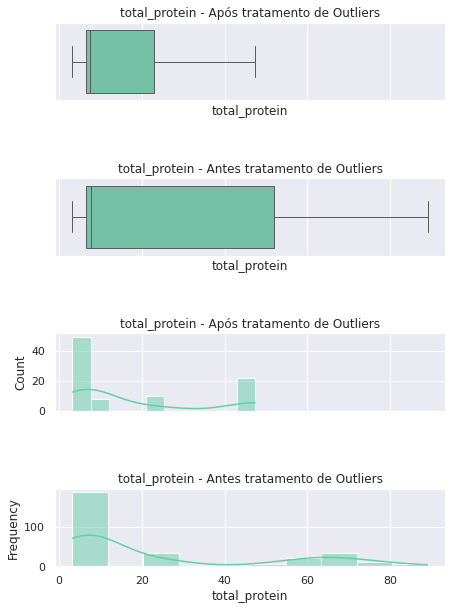

<Figure size 504x576 with 0 Axes>

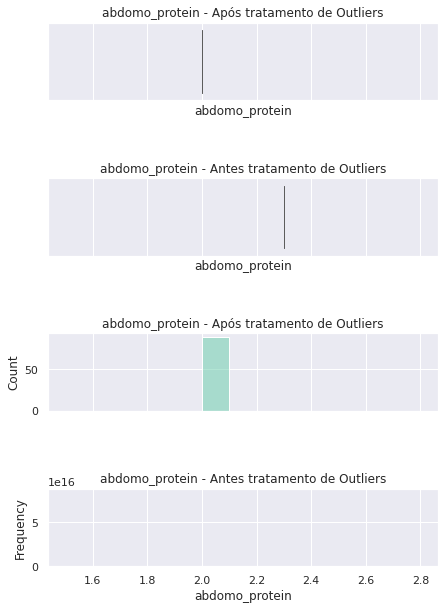

In [172]:
for i in dataTest[numeric_cols]:
    plt.figure()
    plt.tight_layout()
    sns.set_style("darkgrid")
    f, (ax_box1,ax_box2, ax_hist1,ax_hist2 ) = plt.subplots(4, sharex=True, figsize=(7, 10), gridspec_kw={"wspace":0.2, "hspace":1} )

    ax_box1.set_title(i + " - Após tratamento de Outliers")
    ax_box2.set_title(i + " - Antes tratamento de Outliers")
    ax_hist1.set_title(i + " - Após tratamento de Outliers")
    ax_hist2.set_title(i + " - Antes tratamento de Outliers")

    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot( x=i, data=dataTest, ax=ax_box1 , linewidth= 1.0, color=color_norm)
    sns.histplot( dataTest[i], ax=ax_hist1 , bins = 10,kde=True,color=color_norm)
    sns.boxplot(x=i, data=dataTest_beforeOutliers, ax=ax_box2 , linewidth= 1.0, color=color_norm)
    sns.histplot( dataTest_beforeOutliers[i], ax=ax_hist2 , bins = 10,kde=True,color=color_norm)
    plt.show()

### **Separação dos dados de Entrada e Saída**

Nessa etapa, os dados serão separados em data frames de entrada e de saída para utilização nos modelos.

In [173]:
# cria uma lista com o nome dos atributos
train_columns = list(dataTrain.columns) 
# remove a coluna de saída da lista criada
train_columns.remove('outcome') 

In [174]:
X_train = dataTrain[train_columns]
Y_train = dataTrain['outcome']
print("Qtde de registros da Entrada da base de Treino (Linhas, Colunas):  " + str(X_train.shape))
print("Qtde de registros da Saída da base de Treino (Linhas, Colunas):  " + str(Y_train.shape))


Qtde de registros da Entrada da base de Treino (Linhas, Colunas):  (299, 42)
Qtde de registros da Saída da base de Treino (Linhas, Colunas):  (299,)


In [175]:
X_test = dataTest[train_columns]
Y_test = dataTest['outcome']
print("Qtde de registros da Entrada da base de Teste (Linhas, Colunas):  " + str(X_test.shape))
print("Qtde de registros da Saída da base de Teste (Linhas, Colunas):  " + str(Y_test.shape))

Qtde de registros da Entrada da base de Teste (Linhas, Colunas):  (89, 42)
Qtde de registros da Saída da base de Teste (Linhas, Colunas):  (89,)


In [176]:
X_train_beforeOutliers = dataTrain_beforeOutliers[train_columns]
Y_train_beforeOutliers = dataTrain_beforeOutliers['outcome']
print("Qtde de registros da Entrada da base de Treino - sem Trat Outliers (Linhas, Colunas):  " + str(X_train_beforeOutliers.shape))
print("Qtde de registros da Saída da base de Treino - sem Trat Outliers (Linhas, Colunas):  " + str(Y_train_beforeOutliers.shape))

Qtde de registros da Entrada da base de Treino - sem Trat Outliers (Linhas, Colunas):  (299, 42)
Qtde de registros da Saída da base de Treino - sem Trat Outliers (Linhas, Colunas):  (299,)


In [177]:
X_test_beforeOutliers = dataTest_beforeOutliers[train_columns]
Y_test_beforeOutliers = dataTest_beforeOutliers['outcome']
print("Qtde de registros da Entrada da base de Treino - sem Trat Outliers (Linhas, Colunas):  " + str(X_test_beforeOutliers.shape))
print("Qtde de registros da Saída da base de Treino - sem Trat Outliers (Linhas, Colunas):  " + str(Y_test_beforeOutliers.shape))

Qtde de registros da Entrada da base de Treino - sem Trat Outliers (Linhas, Colunas):  (299, 42)
Qtde de registros da Saída da base de Treino - sem Trat Outliers (Linhas, Colunas):  (299,)


### **Normalização** 

Nessa etapa os dados serão normalizados utilizando o **`StandardScaler`**

In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_trainScaled = scaler.transform(X_train)
X_testScaled = scaler.transform(X_test)

X_trainScaled = pd.DataFrame(X_trainScaled, columns=X_train.columns)
X_testScaled = pd.DataFrame(X_testScaled, columns=X_test.columns)


scaler_beforeOutliers = StandardScaler().fit(X_train_beforeOutliers)
X_trainScaled_beforeOutliers = scaler.transform(X_train_beforeOutliers)
X_testScaled_beforeOutliers = scaler.transform(X_test_beforeOutliers)
X_trainScaled_beforeOutliers = pd.DataFrame(X_trainScaled_beforeOutliers, columns=X_train_beforeOutliers.columns)
X_testScaled_beforeOutliers = pd.DataFrame(X_testScaled_beforeOutliers, columns=X_test_beforeOutliers.columns)

Visualização gráfica dos dados antes e após a normalização. 

<Figure size 504x576 with 0 Axes>

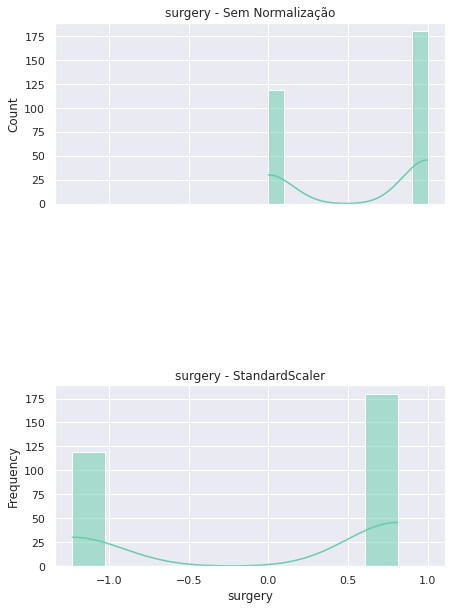

<Figure size 504x576 with 0 Axes>

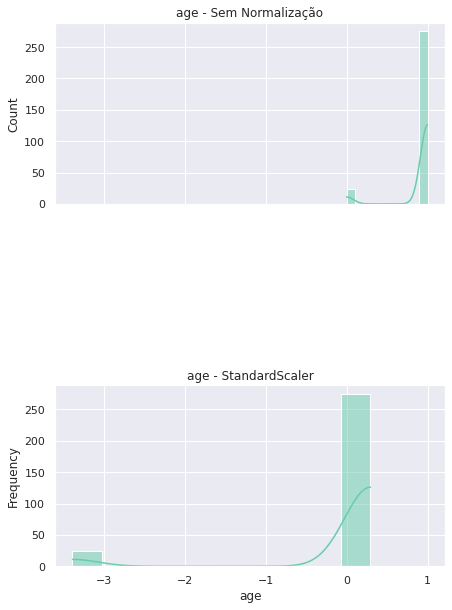

<Figure size 504x576 with 0 Axes>

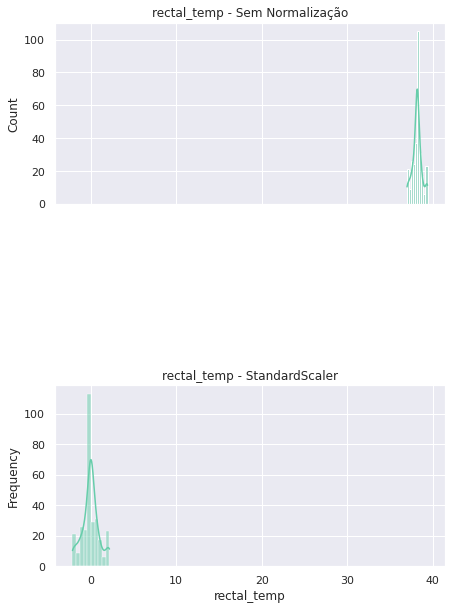

<Figure size 504x576 with 0 Axes>

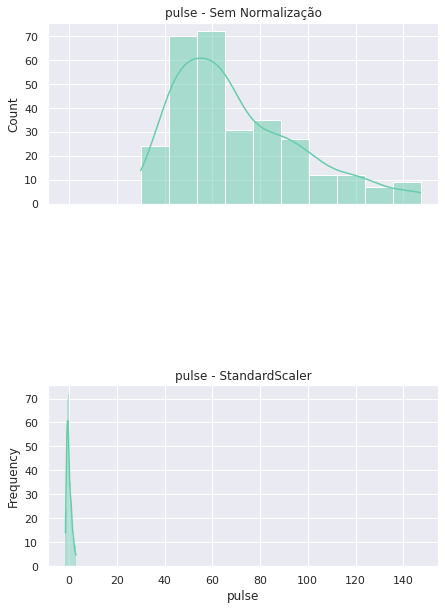

<Figure size 504x576 with 0 Axes>

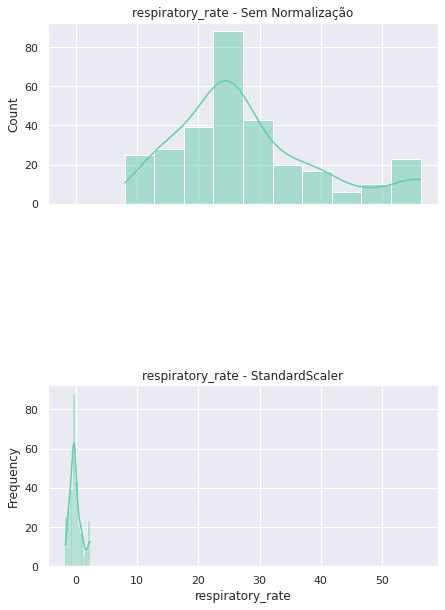

<Figure size 504x576 with 0 Axes>

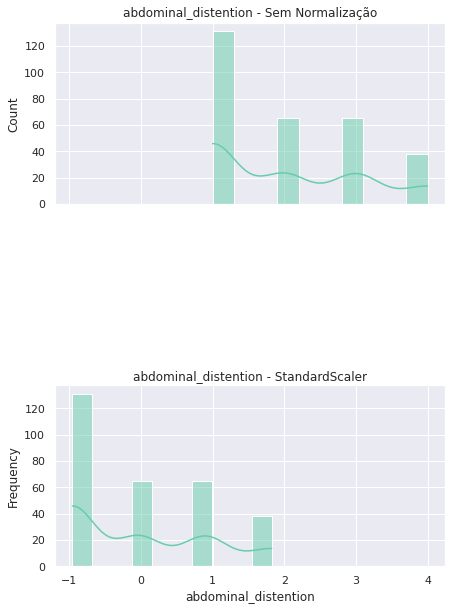

<Figure size 504x576 with 0 Axes>

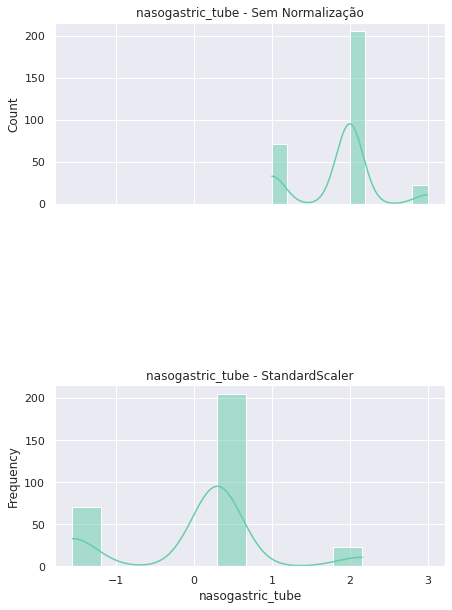

<Figure size 504x576 with 0 Axes>

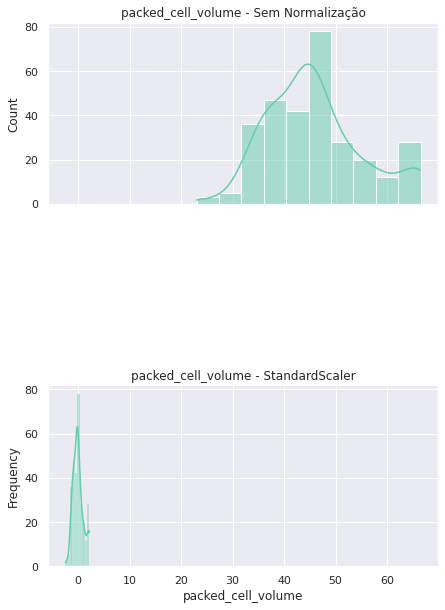

<Figure size 504x576 with 0 Axes>

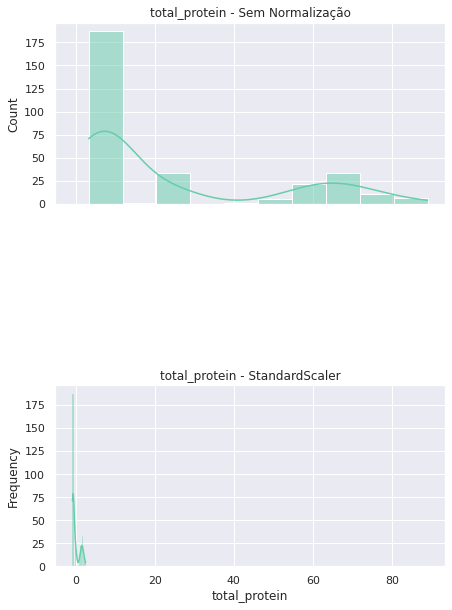

<Figure size 504x576 with 0 Axes>

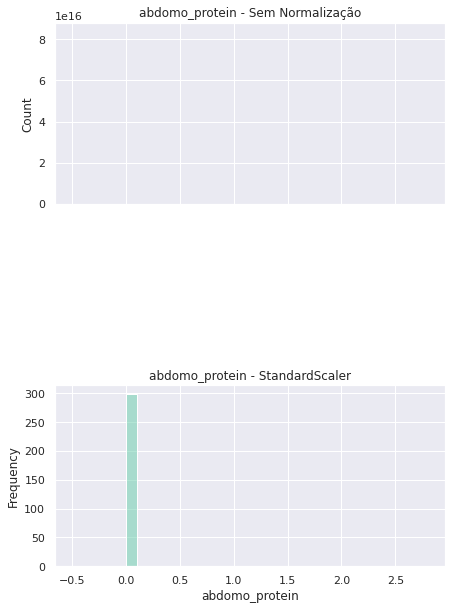

<Figure size 504x576 with 0 Axes>

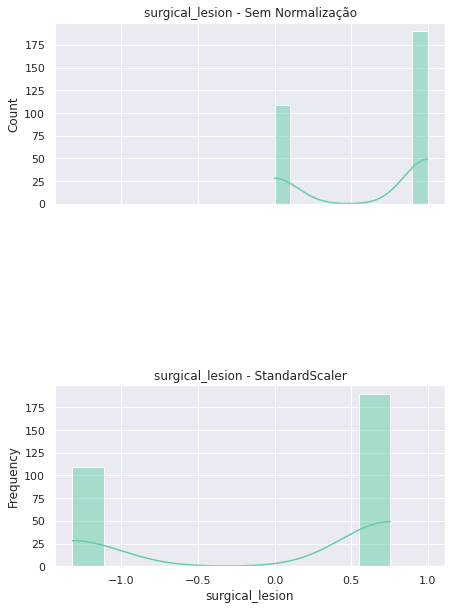

<Figure size 504x576 with 0 Axes>

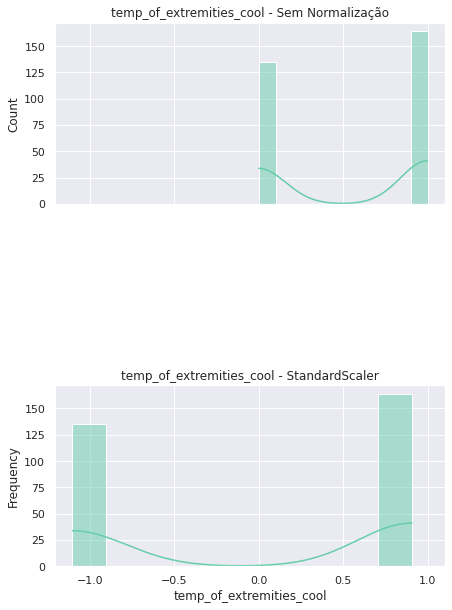

<Figure size 504x576 with 0 Axes>

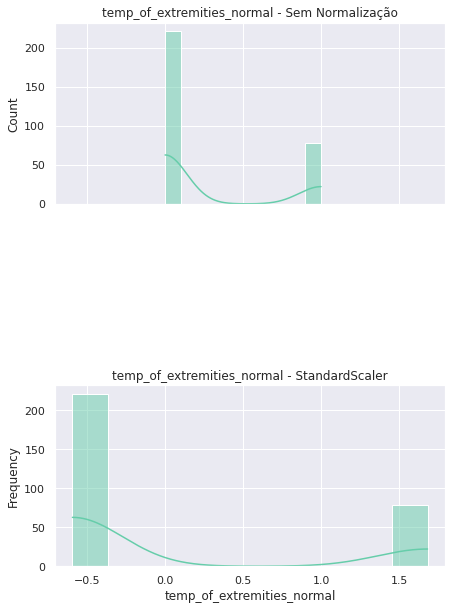

<Figure size 504x576 with 0 Axes>

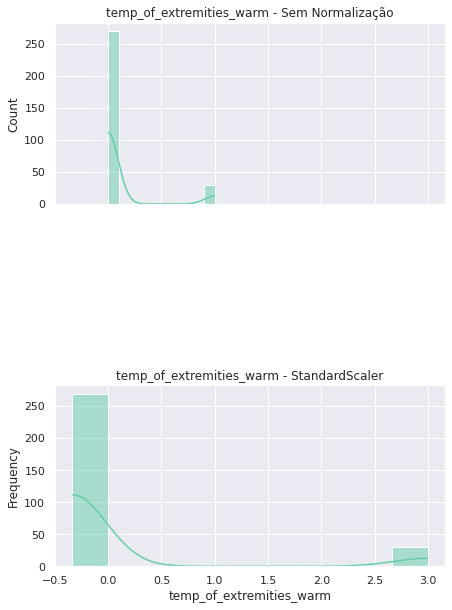

<Figure size 504x576 with 0 Axes>

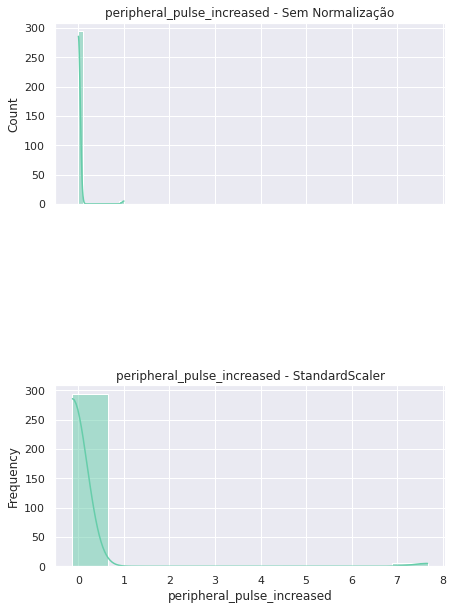

<Figure size 504x576 with 0 Axes>

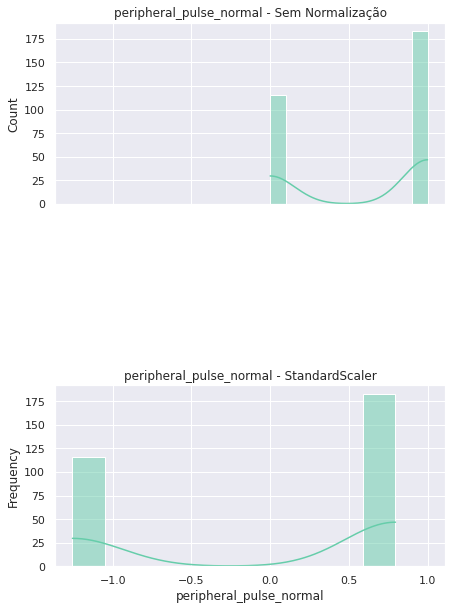

<Figure size 504x576 with 0 Axes>

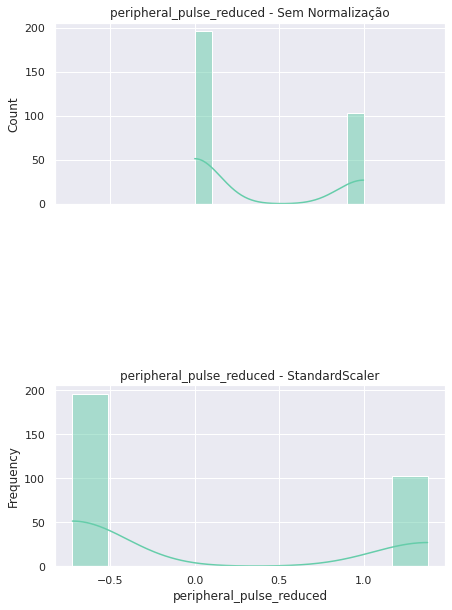

<Figure size 504x576 with 0 Axes>

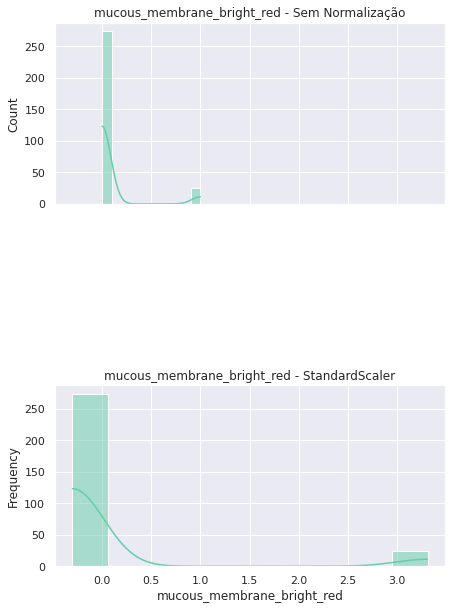

<Figure size 504x576 with 0 Axes>

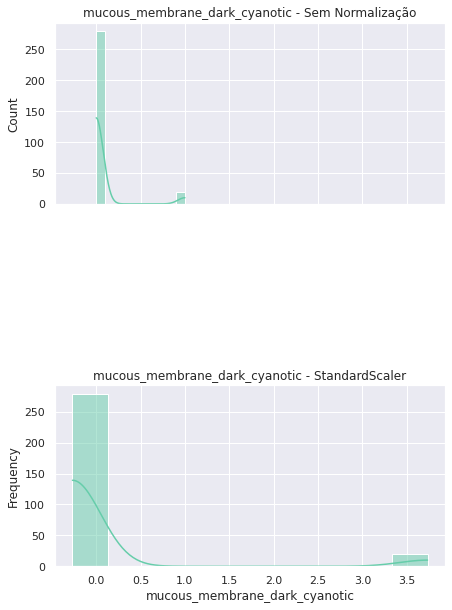

<Figure size 504x576 with 0 Axes>

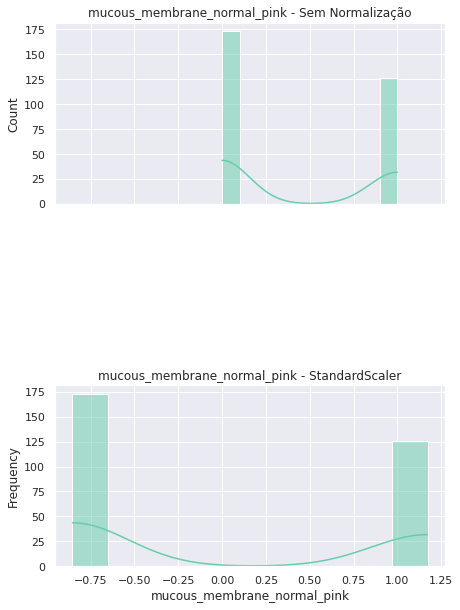

<Figure size 504x576 with 0 Axes>

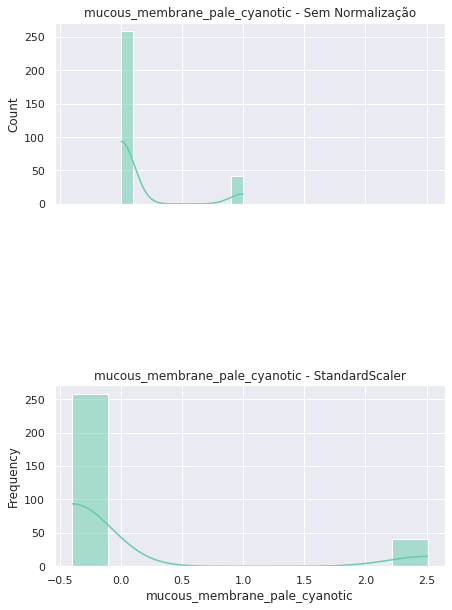

<Figure size 504x576 with 0 Axes>

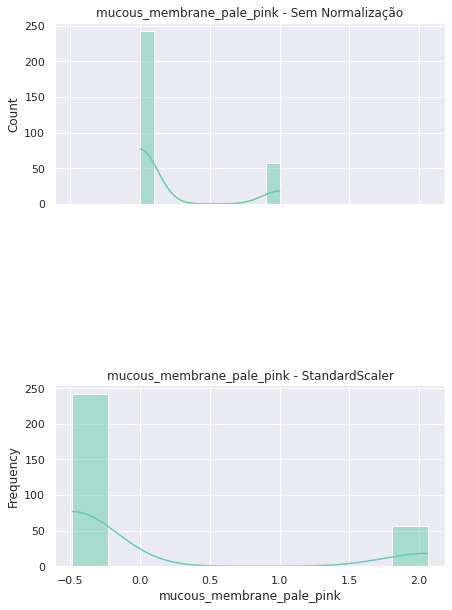

<Figure size 504x576 with 0 Axes>

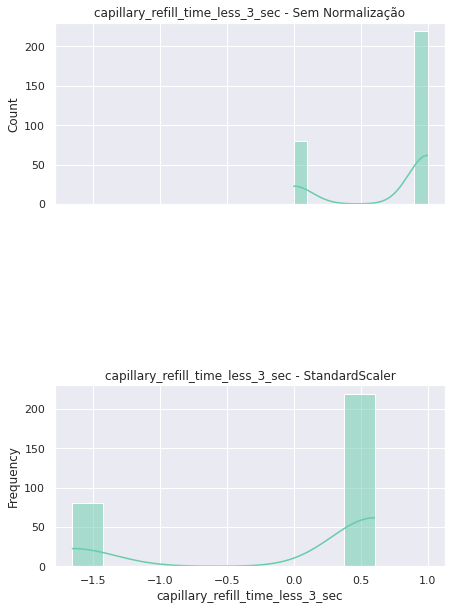

<Figure size 504x576 with 0 Axes>

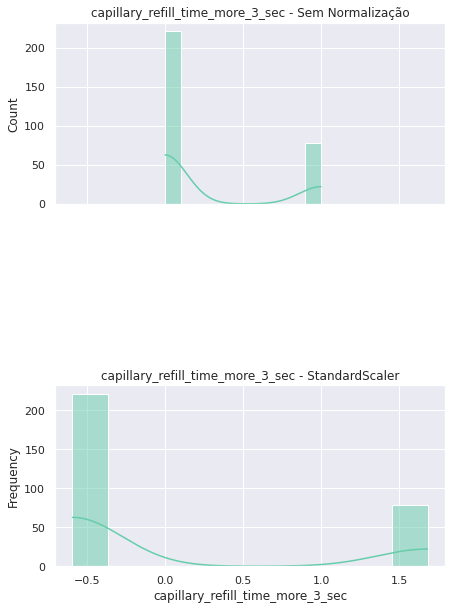

<Figure size 504x576 with 0 Axes>

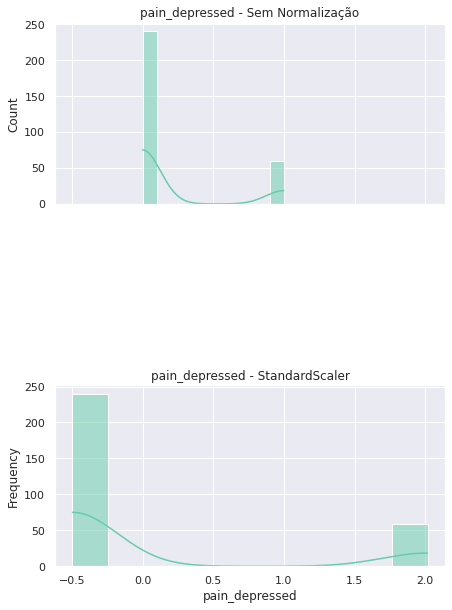

<Figure size 504x576 with 0 Axes>

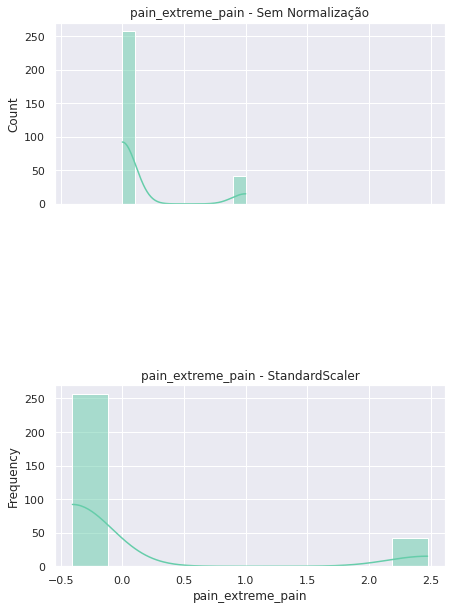

<Figure size 504x576 with 0 Axes>

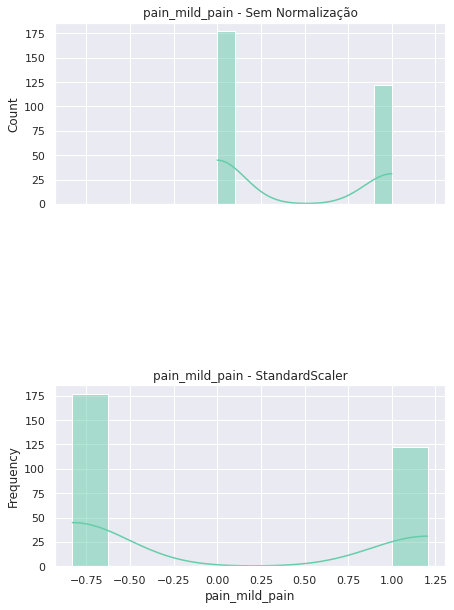

<Figure size 504x576 with 0 Axes>

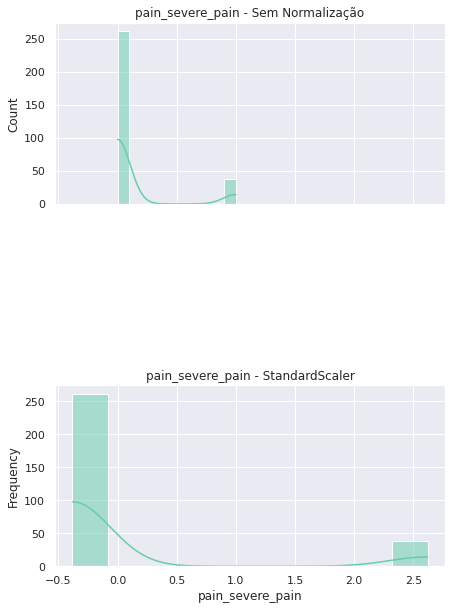

<Figure size 504x576 with 0 Axes>

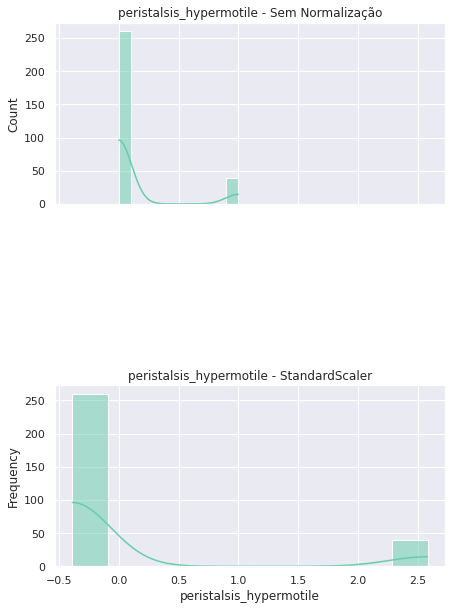

<Figure size 504x576 with 0 Axes>

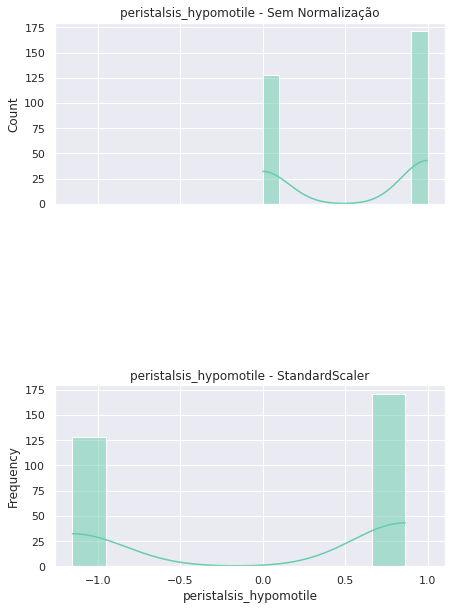

<Figure size 504x576 with 0 Axes>

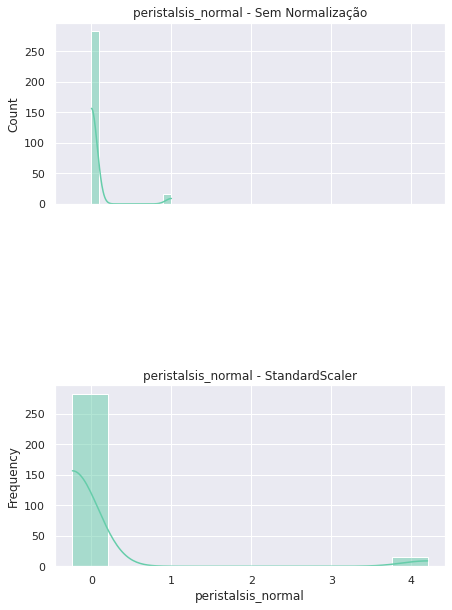

<Figure size 504x576 with 0 Axes>

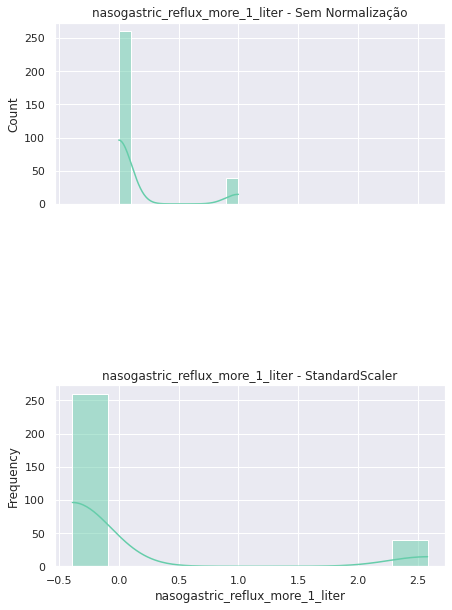

<Figure size 504x576 with 0 Axes>

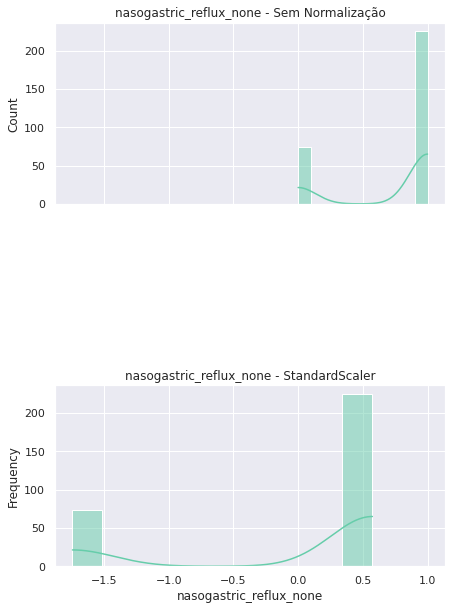

<Figure size 504x576 with 0 Axes>

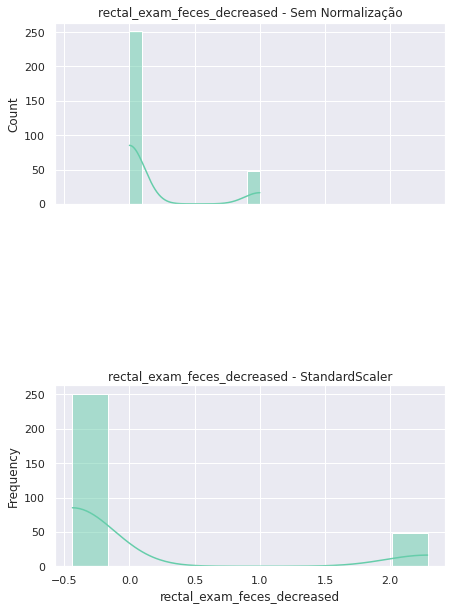

<Figure size 504x576 with 0 Axes>

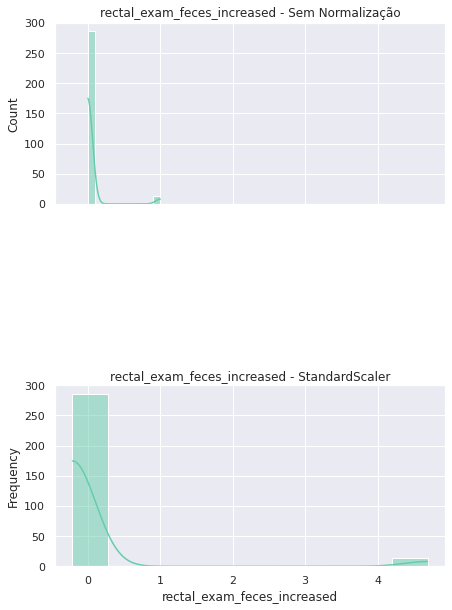

<Figure size 504x576 with 0 Axes>

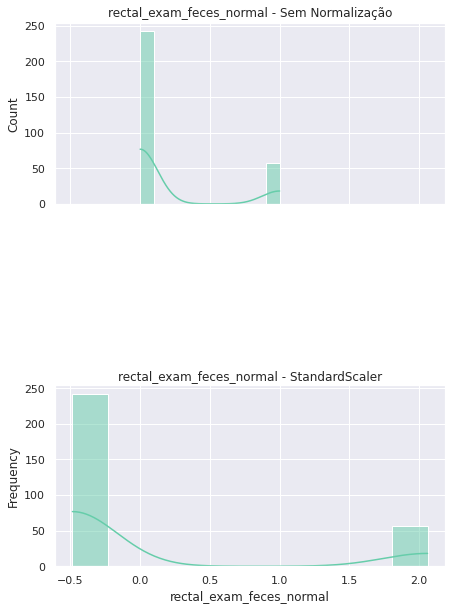

<Figure size 504x576 with 0 Axes>

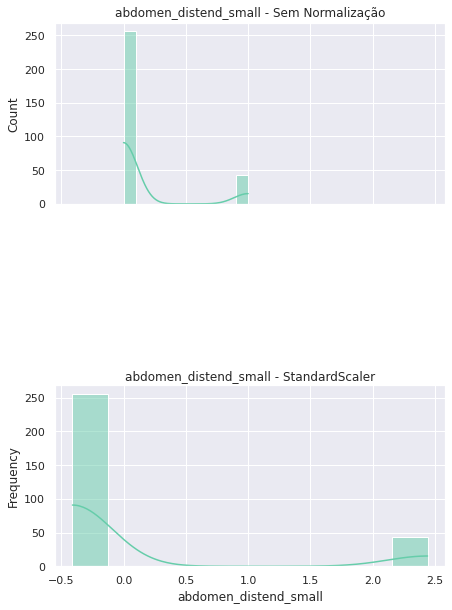

<Figure size 504x576 with 0 Axes>

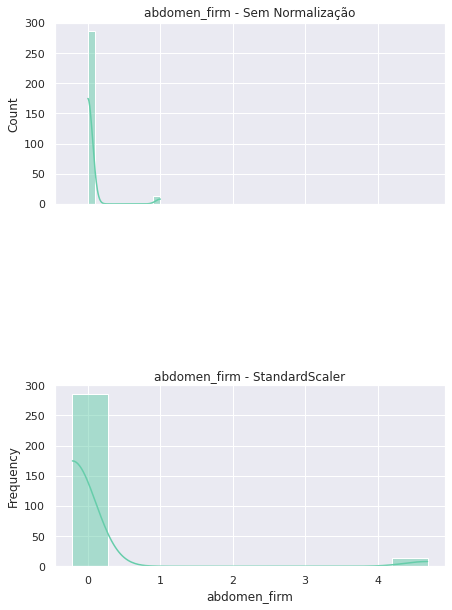

<Figure size 504x576 with 0 Axes>

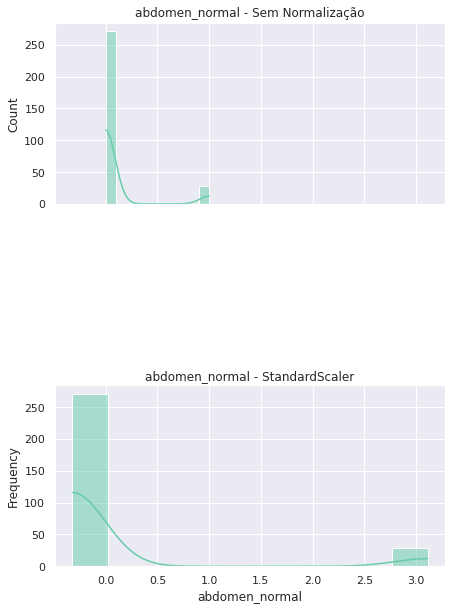

<Figure size 504x576 with 0 Axes>

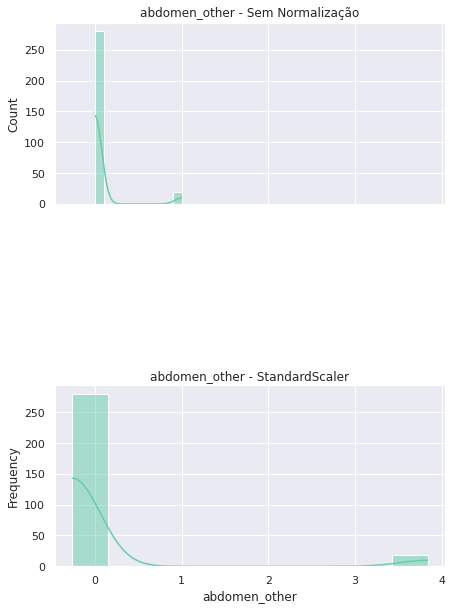

<Figure size 504x576 with 0 Axes>

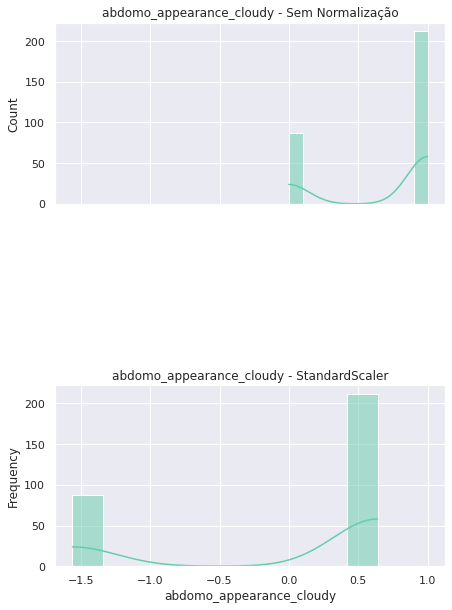

<Figure size 504x576 with 0 Axes>

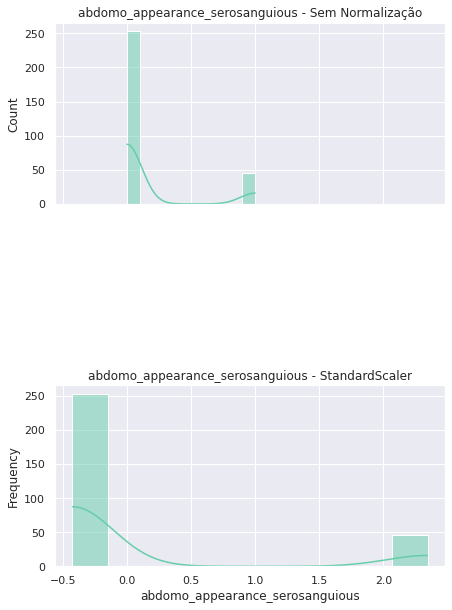

In [179]:
for i in X_train:
    plt.figure()
    plt.tight_layout()
    sns.set_style("darkgrid")
    f, (ax_hist1,ax_hist2) = plt.subplots(2, sharex=True, figsize=(7, 10), gridspec_kw={"wspace":0.2, "hspace":1} )

    ax_hist1.set_title(i + " - Sem Normalização")
    ax_hist2.set_title(i + " - StandardScaler")
    

    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.histplot( X_train[i], ax=ax_hist1 , bins = 10,kde=True,color=color_norm)
    sns.histplot( X_trainScaled[i], ax=ax_hist2 , bins = 10,kde=True,color=color_norm)
    plt.show()

# **Machine Learning**

Para esse trabalho foram escolhidos os seguintes modelos de classificação: 


* **SVC**
* **Decision Tree**
* **KNN**
* **Random Forest**
* **Logistic Regression**


Para avaliação inicial dos modelos os seguintes cenários serão avaliados para cada um dos modelos acima:

* Cenário 1 (sc01): Remoção de dados faltantes > 80%; com tratamento de Outliers

* Cenário 2 (sc02): Remoção de dados faltantes > 80%; sem tratamento de Outliers

* Cenário 3 (sc03): Remoção de dados faltantes > 40%; com tratamento de Outliers

* Cenário 4 (sc04): Remoção de dados faltantes > 40%; sem tratamento de Outliers  


Após essa avaliação inicial, os melhor cenário será escolhido e haverá uma tentativa de aprimoramento dos dois melhores modelos com redução da dimensionalidade por **PCA** e identificação de hiperparamentros com **GridSearchCV**. 


In [180]:
# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

Criação de funções auxiliares para treinamento dos modelos escolhidos

In [181]:
from sklearn.svm import LinearSVC
def train_and_predict_SVC(X_train, y_train,X_test, seed):
  model = LinearSVC(max_iter=30000, random_state=seed)
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  return model, y_pred


In [182]:
from sklearn.tree import DecisionTreeClassifier

def train_and_predict_DTree(X_train, y_train,X_test, seed):
  model = DecisionTreeClassifier(random_state=seed,
                                 max_depth=15,
                                 min_samples_leaf=3) # tente mudar parâmetro para evitar overfitting
  model.fit(X_train, y_train);

  y_pred = model.predict(X_test)

  return model, y_pred

In [183]:
from sklearn.ensemble import RandomForestClassifier

def train_and_predict_RForest(X_train, y_train,X_test, seed):
  model = RandomForestClassifier(min_samples_leaf=5, random_state=seed) # tente mudar parâmetro para evitar overfitting
  model.fit(X_train, y_train);

  y_pred = model.predict(X_test)

  return model, y_pred

In [184]:
from sklearn.neighbors import KNeighborsClassifier

def train_and_predict_KNN(X_train, y_train,X_test, n_neighbors=5):
  model = KNeighborsClassifier(n_neighbors=n_neighbors)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)  # inferência do teste

  return model, y_pred

In [185]:
from sklearn.linear_model import LogisticRegression

def train_and_predict_RL(X_train, y_train, X_test):
  model = LogisticRegression(max_iter=2000)  # max_iter=10000
  model.fit(X_train, y_train);
  y_pred = model.predict(X_test) # inferência do teste

  return model, y_pred

Função para salvar os resultados num dataset

In [186]:
def saving_results(Y_test, y_pred, results, scene, model_name):

  print('Cenário: ', scene)
  print('Modelo: ', model_name)
  
  # Acurácia
  accuracy = accuracy_score(Y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  kappa = cohen_kappa_score(Y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  f1 = f1_score(Y_test, y_pred)
  print('F1: ', f1)


  results.append({'Cenário': scene,
                  'Modelo': model_name, 
                  'Acurácia': accuracy,
                  'Kappa': kappa, 
                  'F1': f1})

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, Y_test)

  fig, ax = plt.subplots(figsize=(8, 6))

  sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap="GnBu", ax=ax)
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Lived', 'Died']) 
  ax.yaxis.set_ticklabels(['Lived', 'Died'])

  plt.show()



Função que executa e salva o resultado de todos os modelos escolhidos

In [187]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#Função que executa e salva o resultado de todos os modelos escolhidos
def predict_and_evaluate(nomeCenario, X_train, Y_train, X_test, Y_test, results, seed):
  
  model, y_pred = train_and_predict_SVC(X_train, Y_train, X_test, seed)
  saving_results(Y_test, y_pred, results,nomeCenario,"SVC")

  model, y_pred = train_and_predict_DTree(X_train, Y_train, X_test, seed)
  saving_results(Y_test, y_pred, results,nomeCenario,"Decision Tree")

  model, y_pred = train_and_predict_RForest(X_train, Y_train, X_test, seed)
  saving_results(Y_test, y_pred, results,nomeCenario,"Random Forest")

  model, y_pred = train_and_predict_KNN(X_train, Y_train, X_test)
  saving_results(Y_test, y_pred, results,nomeCenario,"KNN")
  
  model, y_pred = train_and_predict_RL(X_train, Y_train, X_test)
  saving_results(Y_test, y_pred, results,nomeCenario,"Logistic Regression")



In [188]:
#Criando datasets com remoção dos atributos abdomo_appearance e abdomo_protein, que possuem >40% de dados faltantes. 

X_trainScaled_Removal_40_perc_missing = X_trainScaled.filter(regex='^(?!abdomo_appearance_|abdomo_protein)')
X_testScaled_Removal_40_perc_missing = X_testScaled.filter(regex='^(?!abdomo_appearance_|abdomo_protein)')

X_trainScaled_Removal_40_perc_missing_beforeOutliers = X_trainScaled_beforeOutliers.filter(regex='^(?!abdomo_appearance_|abdomo_protein)')
X_testScaled_Removal_40_perc_missing_beforeOutliers = X_testScaled_beforeOutliers.filter(regex='^(?!abdomo_appearance_|abdomo_protein)')



Para avaliação inicial dos modelos os seguintes cenários serão avaliados:

* **Cenário 1 (`sc01`)**: Remoção de dados faltantes > 80%; com tratamento de Outliers
* **Cenário 2 (`sc02`)**: Remoção de dados faltantes > 80%; sem tratamento de Outliers

* **Cenário 3 (`sc03`)**: Remoção de dados faltantes > 40%; com tratamento de Outliers
* **Cenário 4 (`sc04`)**: Remoção de dados faltantes > 40%; sem tratamento de Outliers







/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Cenário:  Base NÃO Normalizada 
Modelo:  SVC
Acurácia:  0.7865168539325843
Kappa:  0.5383565383565383
F1:  0.6984126984126984


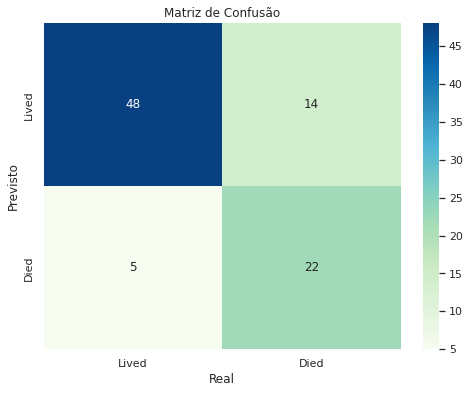

Cenário:  Base NÃO Normalizada 
Modelo:  Decision Tree
Acurácia:  0.8314606741573034
Kappa:  0.6547711404189294
F1:  0.8


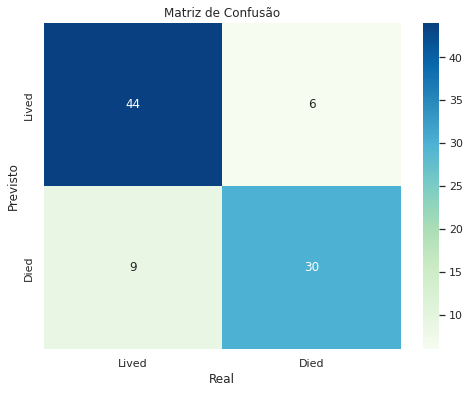

Cenário:  Base NÃO Normalizada 
Modelo:  Random Forest
Acurácia:  0.8651685393258427
Kappa:  0.7176097303014278
F1:  0.8285714285714286


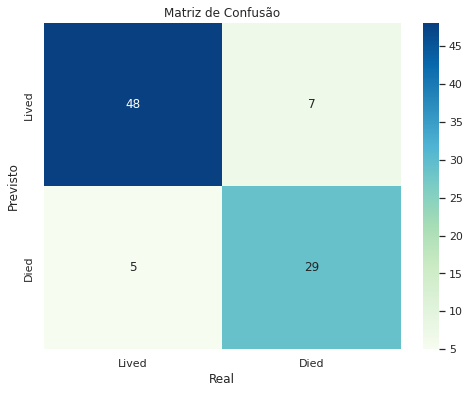

Cenário:  Base NÃO Normalizada 
Modelo:  KNN
Acurácia:  0.8089887640449438
Kappa:  0.5944786920396676
F1:  0.746268656716418


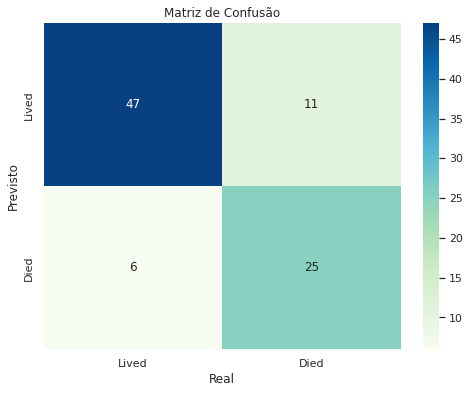

Cenário:  Base NÃO Normalizada 
Modelo:  Logistic Regression
Acurácia:  0.8089887640449438
Kappa:  0.6017372992892867
F1:  0.7605633802816902


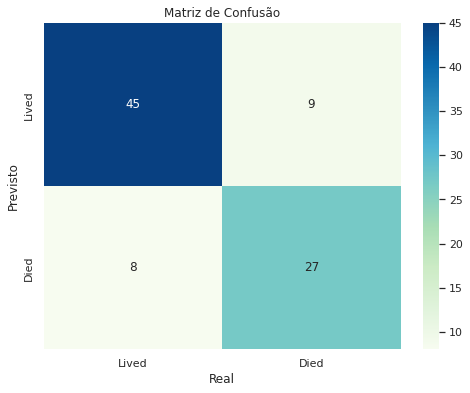

Cenário:  Cenário 1, >80% Missing, Depois Outliers
Modelo:  SVC
Acurácia:  0.8089887640449438
Kappa:  0.6017372992892867
F1:  0.7605633802816902


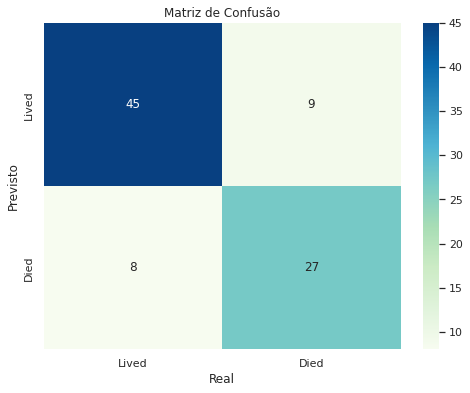

Cenário:  Cenário 1, >80% Missing, Depois Outliers
Modelo:  Decision Tree
Acurácia:  0.8314606741573034
Kappa:  0.6547711404189294
F1:  0.8


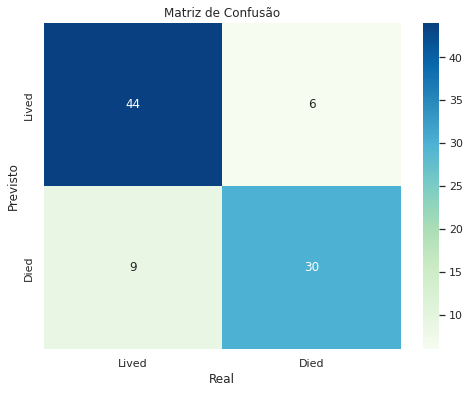

Cenário:  Cenário 1, >80% Missing, Depois Outliers
Modelo:  Random Forest
Acurácia:  0.8651685393258427
Kappa:  0.7176097303014278
F1:  0.8285714285714286


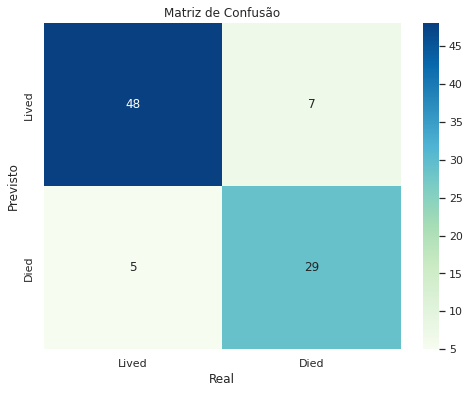

Cenário:  Cenário 1, >80% Missing, Depois Outliers
Modelo:  KNN
Acurácia:  0.8314606741573034
Kappa:  0.6454183266932271
F1:  0.7826086956521738


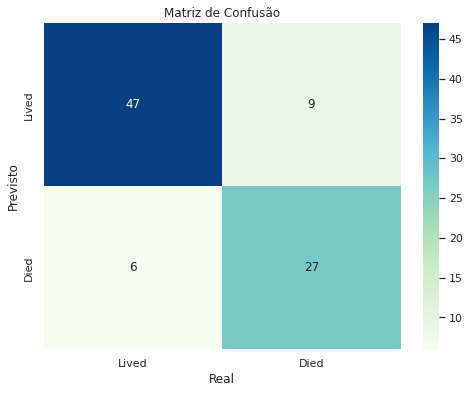

Cenário:  Cenário 1, >80% Missing, Depois Outliers
Modelo:  Logistic Regression
Acurácia:  0.8089887640449438
Kappa:  0.6017372992892867
F1:  0.7605633802816902


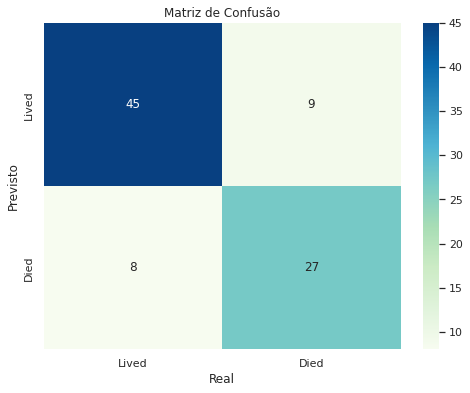

Cenário:  Cenário 2, >80% Missing, Antes Outliers
Modelo:  SVC
Acurácia:  0.7892976588628763
Kappa:  0.5562439633442484
F1:  0.7272727272727274


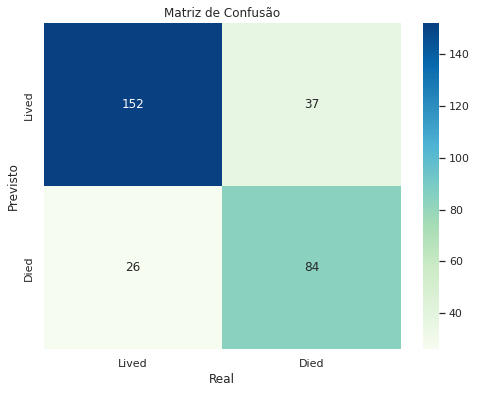

Cenário:  Cenário 2, >80% Missing, Antes Outliers
Modelo:  Decision Tree
Acurácia:  0.9163879598662207
Kappa:  0.8276100643435346
F1:  0.8987854251012146


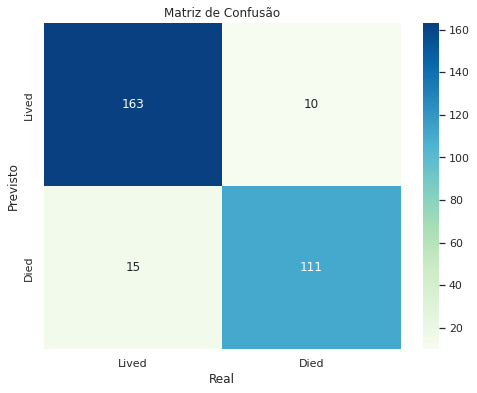

Cenário:  Cenário 2, >80% Missing, Antes Outliers
Modelo:  Random Forest
Acurácia:  0.8595317725752508
Kappa:  0.7053496011262319
F1:  0.8205128205128206


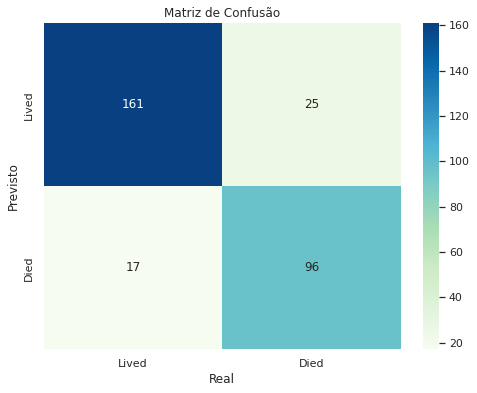

Cenário:  Cenário 2, >80% Missing, Antes Outliers
Modelo:  KNN
Acurácia:  0.7725752508361204
Kappa:  0.5111794970428427
F1:  0.6851851851851851


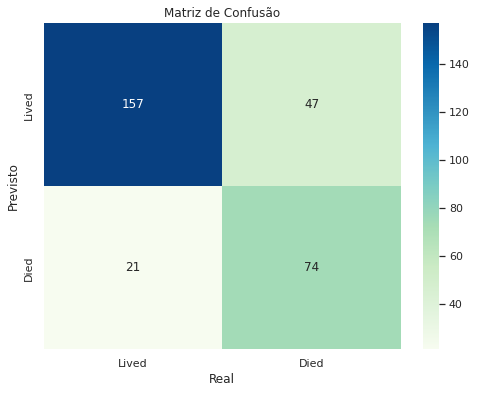

Cenário:  Cenário 2, >80% Missing, Antes Outliers
Modelo:  Logistic Regression
Acurácia:  0.7892976588628763
Kappa:  0.5550490138183537
F1:  0.7248908296943232


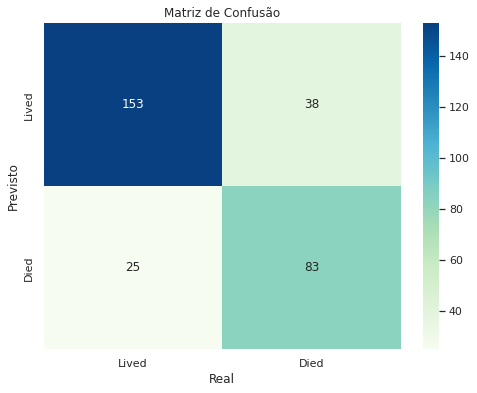

Cenário:  Cenário 3, >40% Missing, Depois Outliers
Modelo:  SVC
Acurácia:  0.8202247191011236
Kappa:  0.6234796404019037
F1:  0.7714285714285715


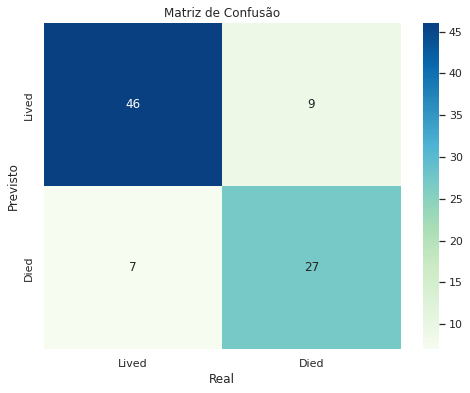

Cenário:  Cenário 3, >40% Missing, Depois Outliers
Modelo:  Decision Tree
Acurácia:  0.8651685393258427
Kappa:  0.7225974025974026
F1:  0.8378378378378377


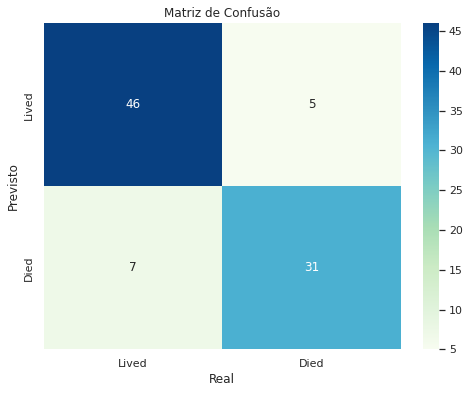

Cenário:  Cenário 3, >40% Missing, Depois Outliers
Modelo:  Random Forest
Acurácia:  0.8651685393258427
Kappa:  0.7176097303014278
F1:  0.8285714285714286


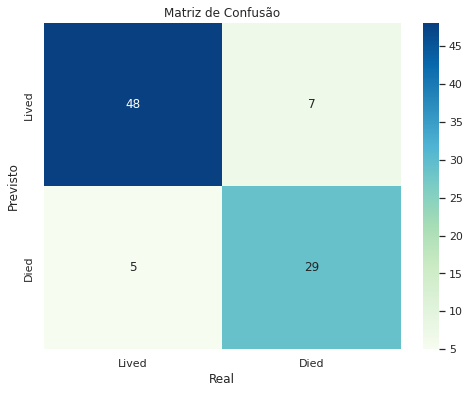

Cenário:  Cenário 3, >40% Missing, Depois Outliers
Modelo:  KNN
Acurácia:  0.8651685393258427
Kappa:  0.720125786163522
F1:  0.8333333333333334


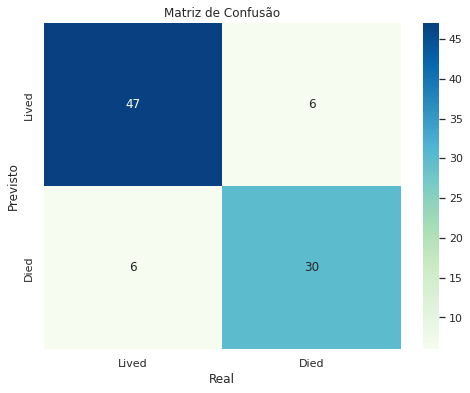

Cenário:  Cenário 3, >40% Missing, Depois Outliers
Modelo:  Logistic Regression
Acurácia:  0.8089887640449438
Kappa:  0.6017372992892867
F1:  0.7605633802816902


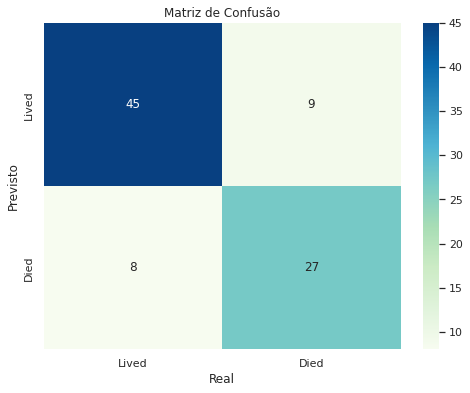

Cenário:  Cenário 4, >40% Missing, Antes Outliers
Modelo:  SVC
Acurácia:  0.7859531772575251
Kappa:  0.5510089160018771
F1:  0.7264957264957265


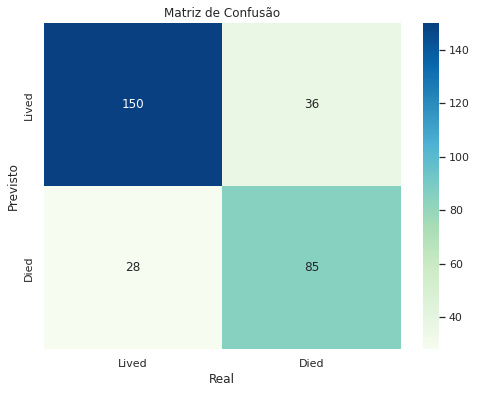

Cenário:  Cenário 4, >40% Missing, Antes Outliers
Modelo:  Decision Tree
Acurácia:  0.9163879598662207
Kappa:  0.8276100643435346
F1:  0.8987854251012146


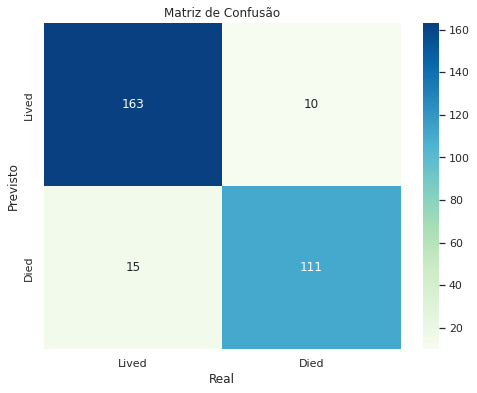

Cenário:  Cenário 4, >40% Missing, Antes Outliers
Modelo:  Random Forest
Acurácia:  0.862876254180602
Kappa:  0.7135145240821668
F1:  0.8270042194092827


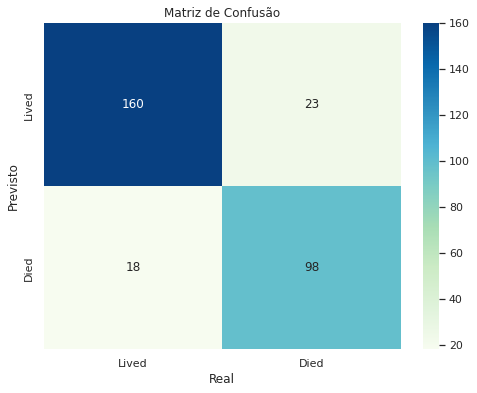

Cenário:  Cenário 4, >40% Missing, Antes Outliers
Modelo:  KNN
Acurácia:  0.8060200668896321
Kappa:  0.5898103032309949
F1:  0.7456140350877193


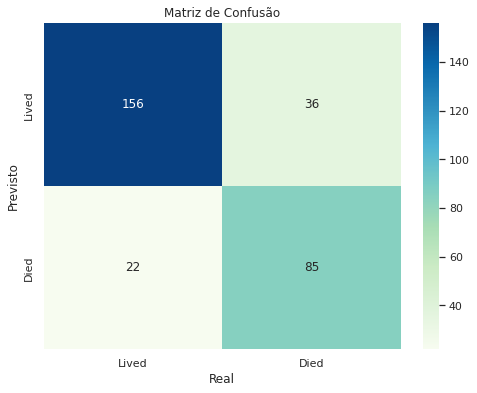

Cenário:  Cenário 4, >40% Missing, Antes Outliers
Modelo:  Logistic Regression
Acurácia:  0.7859531772575251
Kappa:  0.5510089160018771
F1:  0.7264957264957265


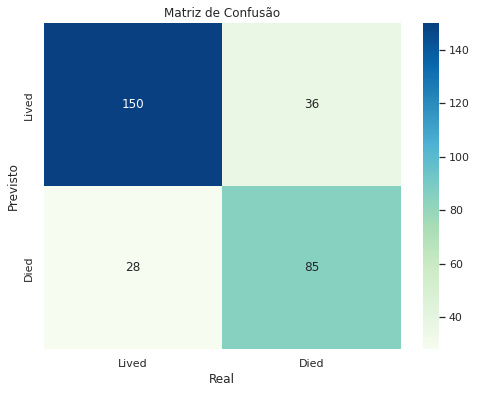

,Cenário,Modelo,Acurácia,Kappa,F1
13,"Cenário 2, >80% Missing, Antes Outliers",KNN,0.772575,0.511179,0.685185
24,"Cenário 4, >40% Missing, Antes Outliers",Logistic Regression,0.785953,0.551009,0.726496
20,"Cenário 4, >40% Missing, Antes Outliers",SVC,0.785953,0.551009,0.726496
0,Base NÃO Normalizada,SVC,0.786517,0.538357,0.698413
14,"Cenário 2, >80% Missing, Antes Outliers",Logistic Regression,0.789298,0.555049,0.724891
10,"Cenário 2, >80% Missing, Antes Outliers",SVC,0.789298,0.556244,0.727273
23,"Cenário 4, >40% Missing, Antes Outliers",KNN,0.806020,0.589810,0.745614
19,"Cenário 3, >40% Missing, Depois Outliers",Logistic Regression,0.808989,0.601737,0.760563
3,Base NÃO Normalizada,KNN,0.808989,0.594479,0.746269
4,Base NÃO Normalizada,Logistic Regression,0.808989,0.601737,0.760563


In [189]:
results = []
predict_and_evaluate("Base NÃO Normalizada ", X_train, Y_train, X_test, Y_test, results,seed )
predict_and_evaluate("Cenário 1, >80% Missing, Depois Outliers", X_trainScaled, Y_train, X_testScaled, Y_test, results,seed )
predict_and_evaluate("Cenário 2, >80% Missing, Antes Outliers", X_trainScaled_beforeOutliers, Y_train_beforeOutliers, X_testScaled_beforeOutliers, Y_test_beforeOutliers, results,seed )
predict_and_evaluate("Cenário 3, >40% Missing, Depois Outliers", X_trainScaled_Removal_40_perc_missing, Y_train, X_testScaled_Removal_40_perc_missing, Y_test, results,seed )
predict_and_evaluate("Cenário 4, >40% Missing, Antes Outliers", X_trainScaled_Removal_40_perc_missing_beforeOutliers, Y_train_beforeOutliers, X_testScaled_Removal_40_perc_missing_beforeOutliers, Y_test_beforeOutliers, results,seed )

pd.DataFrame(results).sort_values(by='Acurácia')



Foi observado que os melhores resultados foram obtidos antes do tratamento de Outliers;  Não fez muita diferença a remoção dos atributos `abdomo_protein` e `abdomo_appearance`.

Os modelos que tiveram melhor desempenho foram:  **Decision Tree** e **Random Forest**. 

Esses dois modelos serão melhor analisados para verificar se é possível melhorar o resultado. 

### **PCA**

Será utilizado o algoritmo PCA (Principal Component Analysis) para redução da dimensão do conjunto de dados 

In [190]:
from sklearn.decomposition import PCA

# redução de dimensionalidade por PCA, 90% 
pca = PCA(n_components=0.90, random_state=seed) 
pca.fit(X_trainScaled_beforeOutliers)  
print('Número de novas dimensões:', pca.n_components_) # verifica número de dimensões criadas

Número de novas dimensões: 27


In [191]:
# transformação das variáveis para o PCA
X_train_pca = pca.transform(X_trainScaled_beforeOutliers)  
X_test_pca = pca.transform(X_trainScaled_beforeOutliers)  

Cenário:  Cenário 2 com PCA
Modelo:  SVC
Acurácia:  0.7725752508361204
Kappa:  0.5216675292899826
F1:  0.706896551724138


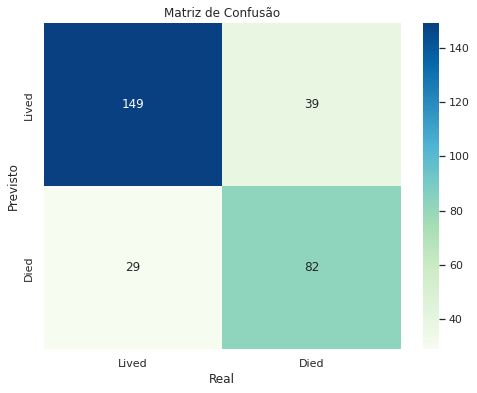

Cenário:  Cenário 2 com PCA
Modelo:  Decision Tree
Acurácia:  0.939799331103679
Kappa:  0.8740581270182992
F1:  0.923728813559322


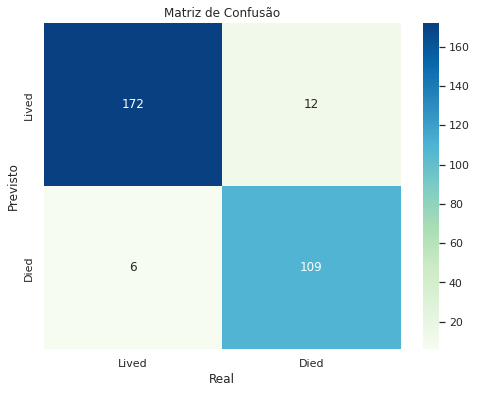

Cenário:  Cenário 2 com PCA
Modelo:  Random Forest
Acurácia:  0.959866220735786
Kappa:  0.915814171750352
F1:  0.9487179487179487


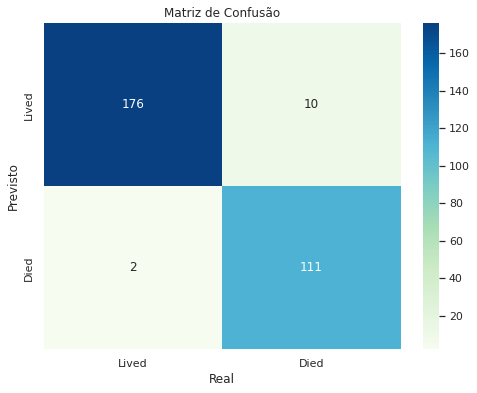

Cenário:  Cenário 2 com PCA
Modelo:  KNN
Acurácia:  0.802675585284281
Kappa:  0.5787626256596385
F1:  0.7330316742081449


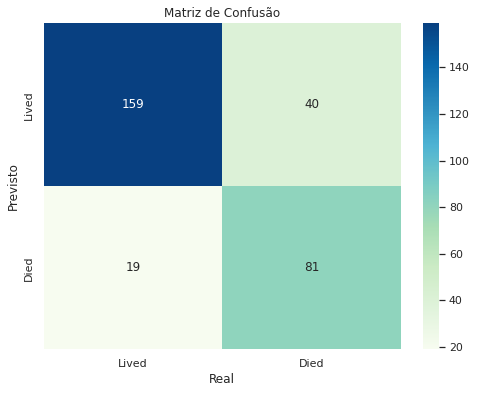

Cenário:  Cenário 2 com PCA
Modelo:  Logistic Regression
Acurácia:  0.7692307692307693
Kappa:  0.5139814836627483
F1:  0.7012987012987013


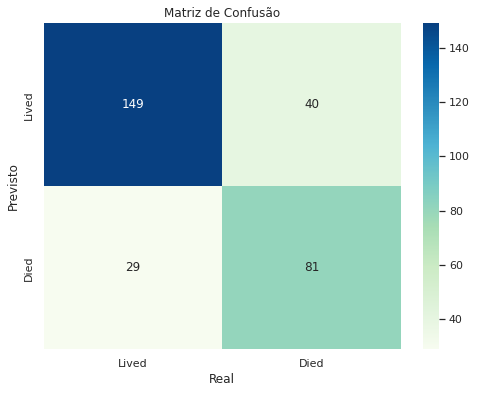

In [192]:
predict_and_evaluate("Cenário 2 com PCA", X_train_pca, Y_train_beforeOutliers, X_test_pca, Y_test_beforeOutliers, results,seed )



In [193]:
pd.DataFrame(results).sort_values(by='Acurácia', ascending=False).head(8)


,Cenário,Modelo,Acurácia,Kappa,F1
27,Cenário 2 com PCA,Random Forest,0.959866,0.915814,0.948718
26,Cenário 2 com PCA,Decision Tree,0.939799,0.874058,0.923729
21,"Cenário 4, >40% Missing, Antes Outliers",Decision Tree,0.916388,0.827610,0.898785
11,"Cenário 2, >80% Missing, Antes Outliers",Decision Tree,0.916388,0.827610,0.898785
2,Base NÃO Normalizada,Random Forest,0.865169,0.717610,0.828571
7,"Cenário 1, >80% Missing, Depois Outliers",Random Forest,0.865169,0.717610,0.828571
18,"Cenário 3, >40% Missing, Depois Outliers",KNN,0.865169,0.720126,0.833333
17,"Cenário 3, >40% Missing, Depois Outliers",Random Forest,0.865169,0.717610,0.828571


A redução de dimensionalidade melhorou a previsão para os modelos Decision Tree e Random Forest. 

A seguir testaremos os dois modelos com o uso do GridSearch para selecionar os melhores parametros e verificar é possível melhorar ainda mais a previsibilidade. 

### **GridSearch**
Essa etapa tem como objetivo encontrar melhores parametros para os dois melhores modelos: **Decision Tree** e **Random Forest**

**Decision Tree**

Hiperparametros:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3}
Cenário:  Cenário 2, PCA, GridSearch
Modelo:  Decision Tree
Acurácia:  0.9096989966555183
Kappa:  0.8113388329321587
F1:  0.8860759493670886


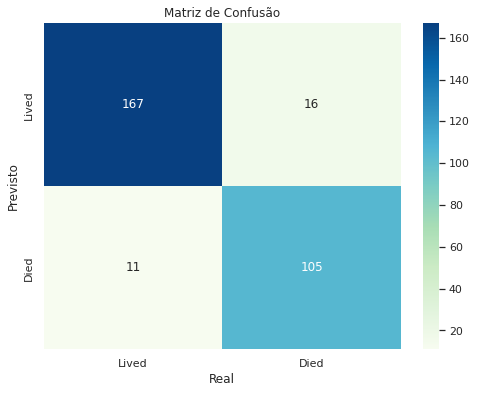

In [194]:
from sklearn.model_selection import GridSearchCV

# Definir parâmetros a serem utilizados
tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': [2,4,5,6,8,10,12,14,16],
                     'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10]}]

# Executar o grid search
model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1')
model.fit(X_train_pca, Y_train_beforeOutliers);  

print("Hiperparametros: ", model.best_params_)

y_pred = model.predict(X_test_pca)

saving_results(Y_test_beforeOutliers,y_pred,results,"Cenário 2, PCA, GridSearch", "Decision Tree")

In [195]:
pd.DataFrame(results).sort_values(by='Acurácia', ascending=False).head(8)


,Cenário,Modelo,Acurácia,Kappa,F1
27,Cenário 2 com PCA,Random Forest,0.959866,0.915814,0.948718
26,Cenário 2 com PCA,Decision Tree,0.939799,0.874058,0.923729
21,"Cenário 4, >40% Missing, Antes Outliers",Decision Tree,0.916388,0.827610,0.898785
11,"Cenário 2, >80% Missing, Antes Outliers",Decision Tree,0.916388,0.827610,0.898785
30,"Cenário 2, PCA, GridSearch",Decision Tree,0.909699,0.811339,0.886076
2,Base NÃO Normalizada,Random Forest,0.865169,0.717610,0.828571
7,"Cenário 1, >80% Missing, Depois Outliers",Random Forest,0.865169,0.717610,0.828571
18,"Cenário 3, >40% Missing, Depois Outliers",KNN,0.865169,0.720126,0.833333


**Random Forest**

Melhores hiperparametros:  {'max_features': 1.0, 'min_samples_leaf': 8, 'n_estimators': 300}
Cenário:  Cenário 2, PCA, GridSearch
Modelo:  Random Forest
Acurácia:  0.919732441471572
Kappa:  0.8320775026910656
F1:  0.8983050847457628


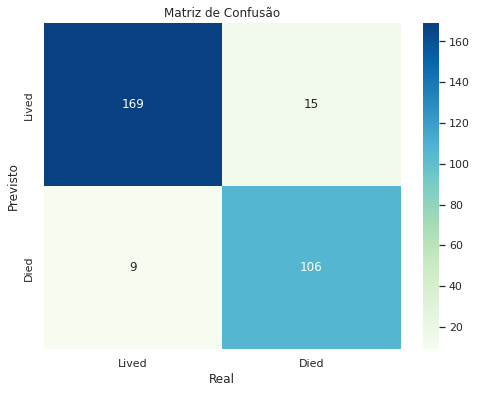

In [196]:
# Definir parâmetros a serem utilizados
tuned_parameters = [{'n_estimators': [20, 50, 100, 150, 200, 300, 400, 500],
                     'max_features': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
                     'min_samples_leaf': [1, 3, 5, 8, 10]}]

# Executar o grid search
model = GridSearchCV(RandomForestClassifier(n_jobs=-1, verbose=0), 
                     tuned_parameters, scoring='f1')

# Executar o grid search
model.fit(X_train_pca, Y_train_beforeOutliers);  

print("Melhores hiperparametros: ", model.best_params_)

y_pred = model.predict(X_test_pca)

saving_results(Y_test_beforeOutliers,y_pred,results,"Cenário 2, PCA, GridSearch", "Random Forest")

In [197]:
pd.DataFrame(results).sort_values(by='Acurácia', ascending=False).head(8)

,Cenário,Modelo,Acurácia,Kappa,F1
27,Cenário 2 com PCA,Random Forest,0.959866,0.915814,0.948718
26,Cenário 2 com PCA,Decision Tree,0.939799,0.874058,0.923729
31,"Cenário 2, PCA, GridSearch",Random Forest,0.919732,0.832078,0.898305
11,"Cenário 2, >80% Missing, Antes Outliers",Decision Tree,0.916388,0.827610,0.898785
21,"Cenário 4, >40% Missing, Antes Outliers",Decision Tree,0.916388,0.827610,0.898785
30,"Cenário 2, PCA, GridSearch",Decision Tree,0.909699,0.811339,0.886076
18,"Cenário 3, >40% Missing, Depois Outliers",KNN,0.865169,0.720126,0.833333
17,"Cenário 3, >40% Missing, Depois Outliers",Random Forest,0.865169,0.717610,0.828571


# **Conclusão**

No trabalho em questão, foram testados vários modelos classificatórios  para determinar qual deles apresentava o melhor desempenho. Depois de realizar uma análise detalhada e comparar os resultados, foi concluído que o modelo Random Forest foi o melhor modelo classificatório para o conjunto de dados, por apresentar uma precisão geral muito alta na classificação dos dados.

No conjunto de dados em questão, a remoção dos outliers não contrbuiu para um melhor resultado. 

Porém, a redução da dimensionalidade através do PCA e a descoberta dos hiperparametros através do GridSearchCV apresentaram uma melhora significativa na precisão do modelo. 


